# ---------------------------------------------
# Topic 1: Convolution (Linear, Circular, 2D)
# ---------------------------------------------

# Part I: 1D Convolution

## Q1.
- Implement a Python function `lin_convolution(x, h)` that computes the linear convolution of two discrete-time signals.
- You are not allowed to use `np.convolve()` or `scipy.signal.convolve()`.

In [1]:
import numpy as np

def lin_convolution(x, h):
    N = len(x) + len(h) - 1

    y = np.zeros(N)

    for n in range(N):
        for k in range(len(h)):
            if 0 <= n - k < len(x):
                y[n] += x[n - k] * h[k]
    return y

## Q2.
- Given the signals x[n] = [1, 2, 0, 1] and h[n] = [2, 2, 1, 1], use your `lin_convolution()` function to compute the output y[n].
- Compare your result to `np.convolve(x, h, mode='full')`. Plot both outputs side-by-side using `plt.stem()`.

My function output: [2. 6. 5. 5. 4. 1. 1.]
NumPy output: [2 6 5 5 4 1 1]


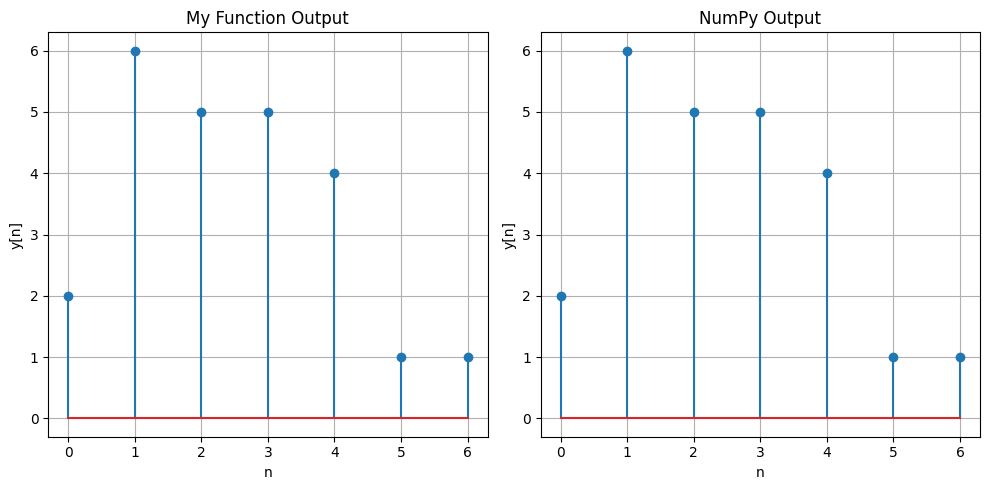

In [2]:
import matplotlib.pyplot as plt

x = [1,2,0,1]
h = [2,2,1,1]

y = lin_convolution(x, h)

print("My function output:", y)

y_np = np.convolve(x, h, mode='full')

print("NumPy output:", y_np)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].stem(y)
ax[0].set_title('My Function Output')
ax[0].set_xlabel('n')
ax[0].set_ylabel('y[n]')
ax[0].grid()

ax[1].stem(y_np)
ax[1].set_title('NumPy Output')
ax[1].set_xlabel('n')
ax[1].set_ylabel('y[n]')
ax[1].grid()

plt.tight_layout()
plt.show()

## Q3.
- Implement and visualize the 'valid' and 'same' convolution modes manually by trimming the output of the full convolution.
- Use the same x[n] and h[n] as in Q2. Plot the outputs.

In [3]:
def valid_convolution(x, h):
    N = len(x) - len(h) + 1
    y = np.zeros(N)

    for n in range(N):
        for k in range(len(h)):
            y[n] += x[n + k] * h[len(h) - 1 - k]
    return y

def same_convolution(x, h):
    full = lin_convolution(x, h)
    N = len(x)

    start = (len(full) - N) // 2
    end = start + N

    y = full[start:end]

    return y

In [4]:
x = [1,2,0,1]
h = [2,2,1,1]

y_valid = valid_convolution(x, h)
print("Valid convolution output:", y_valid)
y_valid_np = np.convolve(x, h, mode='valid')
print("NumPy valid convolution output:", y_valid_np)

y_same = same_convolution(x, h)
print("Same convolution output:", y_same)
y_same_np = np.convolve(x, h, mode='same')
print("NumPy same convolution output:", y_same_np)

Valid convolution output: [5.]
NumPy valid convolution output: [5]
Same convolution output: [6. 5. 5. 4.]
NumPy same convolution output: [6 5 5 4]


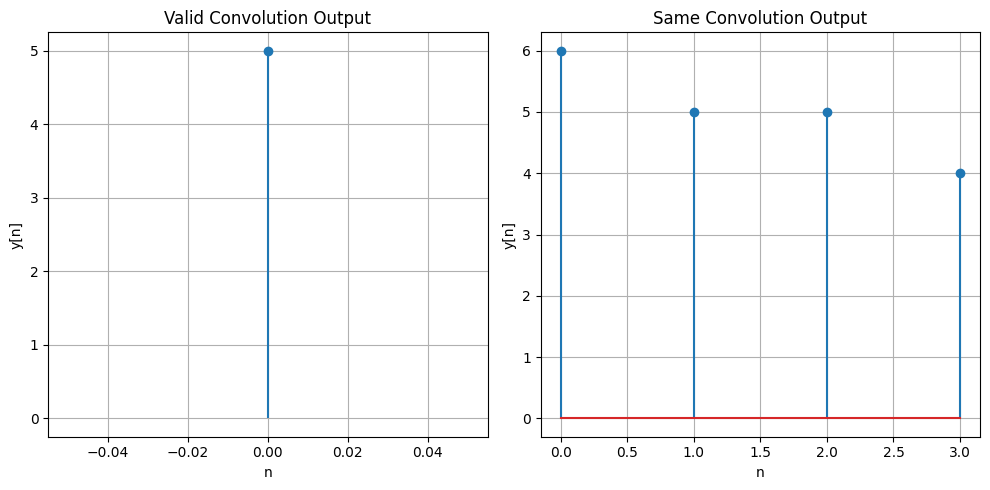

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].stem(y_valid)
ax[0].set_title('Valid Convolution Output')
ax[0].set_xlabel('n')
ax[0].set_ylabel('y[n]')
ax[0].grid()

ax[1].stem(y_same)
ax[1].set_title('Same Convolution Output')
ax[1].set_xlabel('n')
ax[1].set_ylabel('y[n]')
ax[1].grid()

plt.tight_layout()
plt.show()

# Part II: Circular Convolution

## Q4.
- Implement a function `circ_convolution(x, h)` that computes the circular convolution of two equal-length signals.
- Then verify that it matches the result of using the DFT (i.e. circular convolution in time domain = multiplication in frequency domain).
- Plot the circular convolution using both time and DFT-based methods side-by-side.

In [6]:
def circ_convolution(x, h):
    N = max(len(x), len(h))

    if len(x) < N:
        x = np.pad(x, (0, N - len(x)), 'constant')
    if len(h) < N:
        h = np.pad(h, (0, N - len(h)), 'constant')

    y = np.zeros(N)

    for n in range(N):
        for k in range(N):
            y[n] += x[k] * h[(n - k) % N]
    return y

In [7]:
def DFT(x):
    N = len(x)

    X = np.zeros(N, dtype=complex)

    for k in range (N):
        for n in range (N):
            X[k] += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)
    
    return X

def iDFT(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)

    for n in range (N):
        for k in range (N):
            x[n] += X[k] * np.exp(1j * 2 * np.pi * k * n / N)
        x[n] /= N
    
    return x

Circular convolution from time domain: [6. 7. 6. 5.]
Circular convolution from frequency domain: [6. 7. 6. 5.]


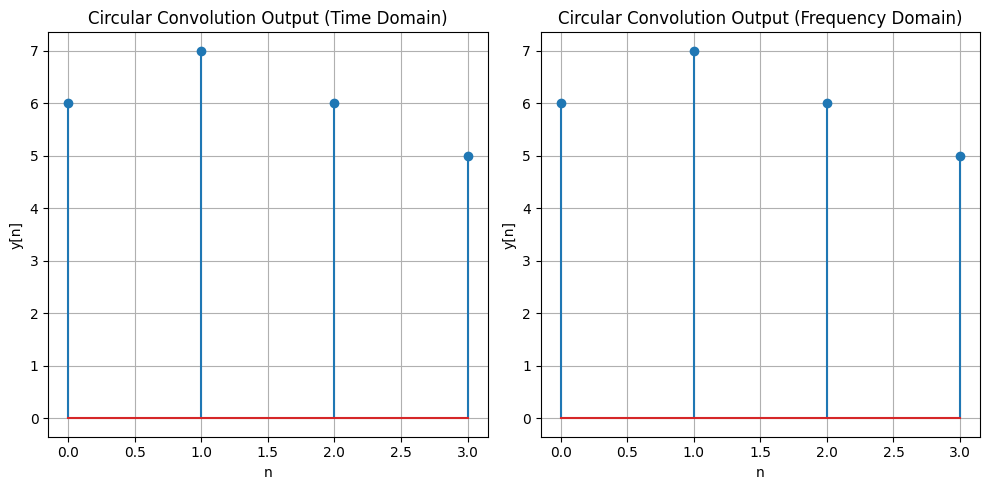

In [8]:
x = [1,2,0,1]
h = [2,2,1,1]

y_circ = circ_convolution(x, h)
print("Circular convolution from time domain:", y_circ)

x_freq = DFT(x)
h_freq = DFT(h)
y_freq = x_freq * h_freq
y_circ_from_freq = iDFT(y_freq)
print("Circular convolution from frequency domain:", y_circ_from_freq.real)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].stem(y_circ)
ax[0].set_title('Circular Convolution Output (Time Domain)')
ax[0].set_xlabel('n')
ax[0].set_ylabel('y[n]')
ax[0].grid()

ax[1].stem(y_circ_from_freq.real)
ax[1].set_title('Circular Convolution Output (Frequency Domain)')
ax[1].set_xlabel('n')
ax[1].set_ylabel('y[n]')
ax[1].grid()

plt.tight_layout()
plt.show()

# Part III: 2D Convolution

## Q5.
- Load the 512×512 grayscale test image provided (`ascent()` from `scipy.datasets` or `./image/christoph512.jpg`).
- Convolve the image with at least two 2D kernels:
    - (a) An edge-detection kernel
    - (b) A box blur kernel
- Use `scipy.signal.convolve2d(image, kernel, mode='same')`.
- Display the original and filtered images using `plt.imshow()` with grayscale colormap.

In [9]:
from scipy.signal import convolve2d
from PIL import Image

img = np.array(Image.open('./image/christoph512.jpg').convert('L'))

In [10]:
# Example: simple vertical edge detection kernel
edge_kernel = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])

edge_img = convolve2d(img, edge_kernel, mode='same', boundary='symm')

In [11]:
# Simple 5x5 box blur kernel (average filter)
box_kernel = np.ones((5, 5)) / 25

blur_img = convolve2d(img, box_kernel, mode='same', boundary='symm')

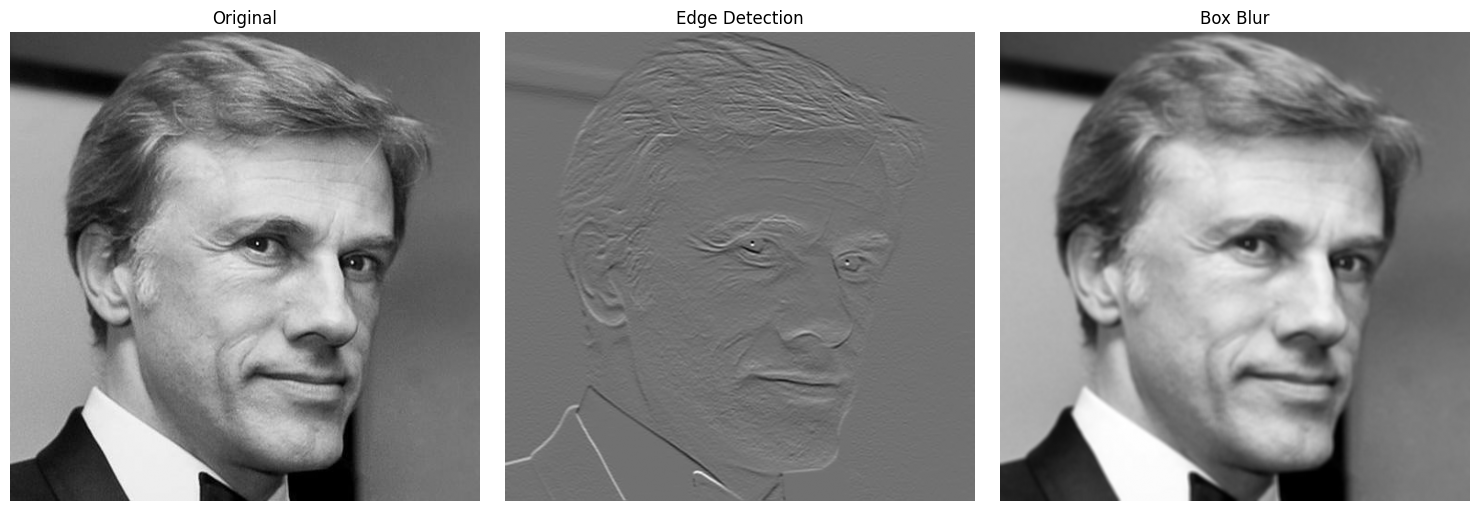

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(edge_img, cmap='gray')
ax[1].set_title('Edge Detection')
ax[1].axis('off')

ax[2].imshow(blur_img, cmap='gray')
ax[2].set_title('Box Blur')
ax[2].axis('off')

plt.tight_layout()
plt.show()

# Part IV: Audio Reverb Convolution

## Q6.
- Load a speech signal (`./audio/speech.wav`) and an impulse response from a room (`./audio/1st_baptist_nashville_balcony.wav`).
- Resample the impulse response to match the sampling rate of the speech signal.
- Normalize both signals and convolve them using `scipy.signal.convolve(x, h, mode='same')`.
- Play the resulting convolved signal and save it to a new WAV file.

In [13]:
import scipy.signal as sig
import scipy.io.wavfile as wav

# Step 1: Load the audio files
fsh, h = wav.read('./audio/1st_baptist_nashville_balcony.wav')  # Impulse response
fsx, x = wav.read('./audio/speech.wav')                         # Speech signal

/var/folders/z2/gvdzcbjs5k9fzscmw5rqxx6h0000gn/T/ipykernel_4622/1070950327.py:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fsh, h = wav.read('./audio/1st_baptist_nashville_balcony.wav')  # Impulse response


In [14]:
# Step 2: make both signals mono
if len(h.shape) > 1:
    h = np.mean(h, axis=1)
if len(x.shape) > 1:
    x = np.mean(x, axis=1)

# Step 3: Normalize both signals
h = h / np.max(np.abs(h))
x = x / np.max(np.abs(x))

# Step 4: Resample h to match x sampling rate
if fsh != fsx:
    h = sig.resample(h, int(len(h) * fsx / fsh))

# Step 5: Convolve speech with impulse response
y = sig.convolve(x, h, mode='same')
y = y / np.max(np.abs(y))  # Normalize after convolution to prevent clipping

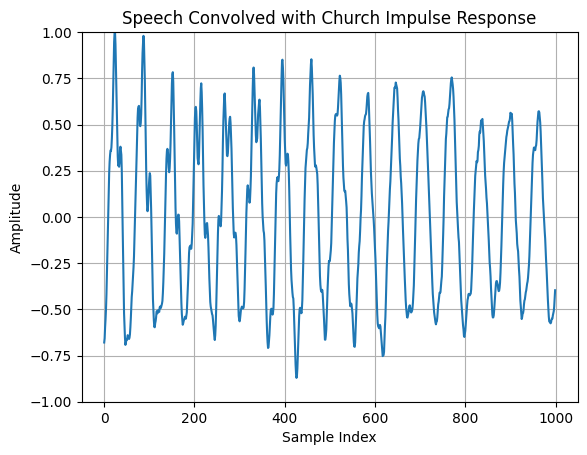

In [15]:
# Step 6: Plot and optionally listen or save
plt.plot(y)
plt.title("Speech Convolved with Church Impulse Response")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid()
plt.ylim(-1, 1)
plt.show()

wav.write('./audio/convolved_speech.wav', fsx, y.astype(np.float32))

# ---------------------------------------------
# Topic 2: Discrete Fourier Transform (DFT)
# ---------------------------------------------

# Part I: DFT and iDFT Implementation

## Q1.
- Implement the Discrete Fourier Transform (DFT) function from scratch:
    -     def DFT(x): ...
- Use the formula:
    -     X[k] = sum_{n=0}^{N-1} x[n] * exp(-j * 2π * k * n / N)

In [16]:
def DFT(x):
    N = len(x)

    X = np.zeros(N, dtype=complex)

    for k in range (N):
        for n in range (N):
            X[k] += x[n] * np.exp(-1j * 2 * np.pi * n * k / N)
    return X

## Q2.
- Implement the inverse DFT (iDFT) function from scratch:
    -     def iDFT(X): ...
- Use the formula:
    -     x[n] = (1/N) * sum_{k=0}^{N-1} X[k] * exp(+j * 2π * k * n / N)

In [17]:
def iDFT(X):
    N = len(X)
    x = np.zeros(N, dtype=complex)

    for n in range (N):
        for k in range (N):
            x[n] += X[k] * np.exp(1j * 2 * np.pi * k * n / N)
        x[n] /= N
    return x

# Part II: Analysis of Speech Signal

## Q3.
- Load a speech signal (`./audio/speech.wav`) and normalize it to lie within [-1, 1].
- Use your DFT implementation to compute its amplitude and phase spectrum.
- Plot the following three plots side-by-side:
    -     (a) Time-domain signal
    -     (b) Amplitude spectrum
    -     (c) Phase spectrum
- Label all axes using physical units (seconds, Hz, radians).

In [18]:
import scipy.io.wavfile as wav

# Load speech signal
fsx, x = wav.read('./audio/speech.wav')

# Normalize to range [-1, 1]
x = x / np.max(np.abs(x))

In [19]:
X = np.fft.fft(x)

amplitude = np.abs(X)
phase = np.angle(X)
phase[amplitude < 0.01] = 0

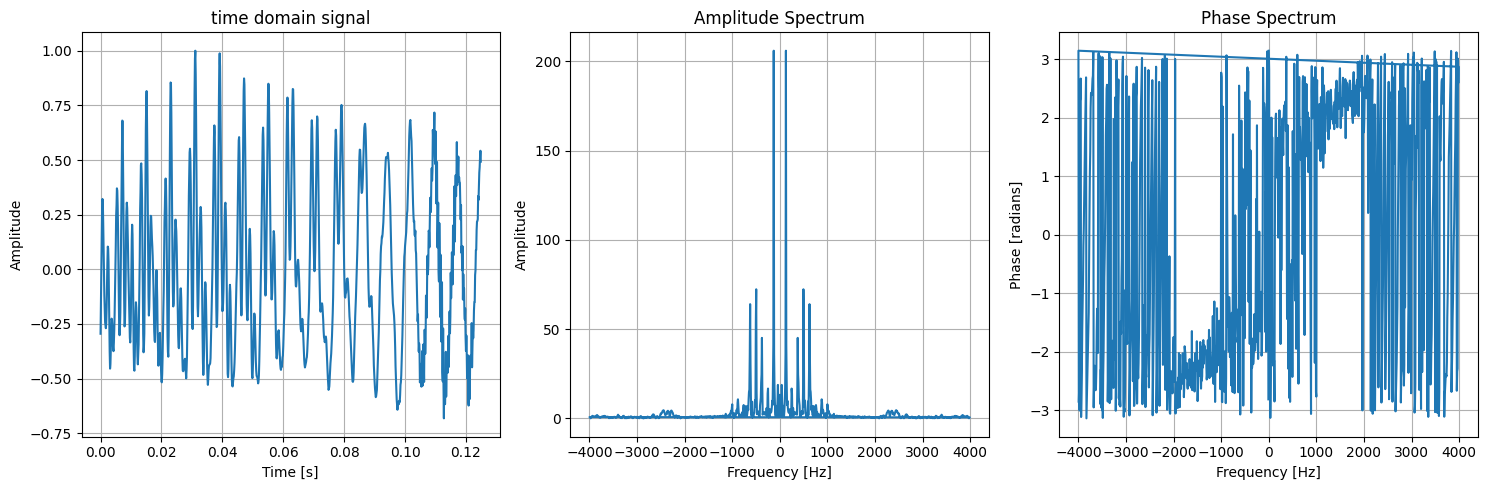

In [20]:
t = np.arange(len(x)) / fsx
f = np.fft.fftfreq(len(x), d=1/fsx)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].set_title('time domain signal')
ax[0].plot(t, x)
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude')
ax[0].grid()

ax[1].set_title('Amplitude Spectrum')
ax[1].plot(f, amplitude)
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Amplitude')
ax[1].grid()

ax[2].set_title('Phase Spectrum')
ax[2].plot(f, phase)
ax[2].set_xlabel('Frequency [Hz]')
ax[2].set_ylabel('Phase [radians]')
ax[2].grid()

plt.tight_layout()
plt.show()

## Q4.
- Apply `np.fft.fftshift()` to center the zero-frequency component in the DFT.
- Plot the shifted amplitude and phase spectra.

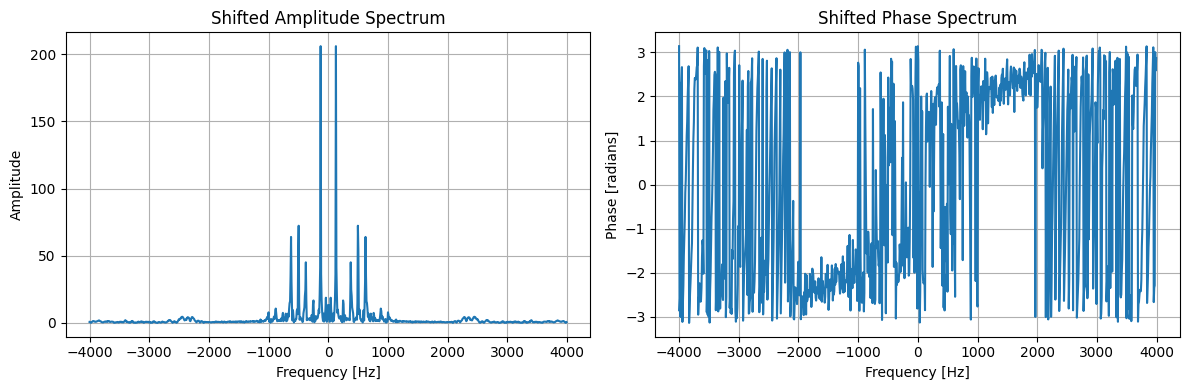

In [21]:
X_shifted = np.fft.fftshift(X)

f_shifted = np.fft.fftshift(np.fft.fftfreq(len(x), d=1/fsx))

amplitude_shifted = np.abs(X_shifted)
phase_shifted = np.angle(X_shifted)
phase_shifted[amplitude_shifted < 0.01] = 0

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(f_shifted, amplitude_shifted)
ax[0].set_title('Shifted Amplitude Spectrum')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel('Amplitude')
ax[0].grid()

ax[1].plot(f_shifted, phase_shifted)
ax[1].set_title('Shifted Phase Spectrum')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Phase [radians]')
ax[1].grid()

plt.tight_layout()
plt.show()

# Part III: Spectrum Properties

## Q5.
- Use your iDFT function to recover the time-domain signal from the DFT result.
- Plot the reconstructed signal and compare visually to the original.
- Comment on whether the DFT/iDFT cycle preserved the signal.

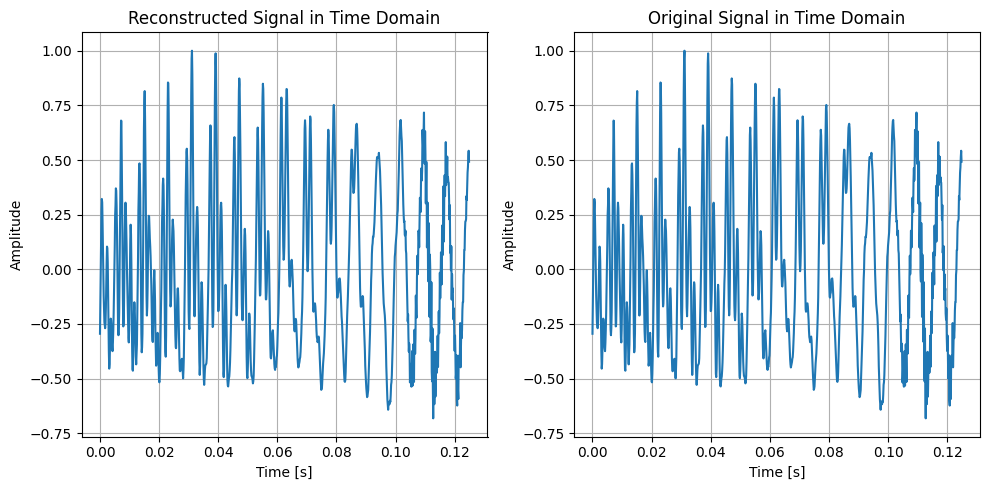

In [22]:
x_reconstructed = np.fft.ifft(X)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title('Reconstructed Signal in Time Domain')
ax[0].plot(t, x_reconstructed.real)
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude')
ax[0].grid()

ax[1].set_title('Original Signal in Time Domain')
ax[1].plot(t, x)
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Amplitude')
ax[1].grid()

plt.tight_layout()
plt.show()


# Part IV: Circular Convolution in Frequency Domain

## Q7.
- Show that circular convolution in time domain is equivalent to multiplication in frequency domain:
    -     y[n] = ifft( fft(x) * fft(h) )
- Generate two signals x[n] and h[n], zero-pad them to equal length N, and show this result.

In [23]:
x = [1,2,0,1]
h = [2,2]

N = max(len(x), len(h))
x_padded = np.pad(x, (0, N - len(x)))
h_padded = np.pad(h, (0, N - len(h)))

X = np.fft.fft(x_padded)
H = np.fft.fft(h_padded)
Y = X * H
y_freq = np.fft.ifft(Y).real

y_time = circ_convolution(x_padded, h_padded)

print("Circular convolution via time domain:", y_time)
print("Circular convolution via freq domain:", y_freq)

Circular convolution via time domain: [4. 6. 4. 2.]
Circular convolution via freq domain: [4. 6. 4. 2.]


# ---------------------------------------------
# Topic 3: Hilbert Transform & Analytic Signal
# ---------------------------------------------

# Part I: Analytic Signal Construction

## Q1.
- Generate a sinusoidal signal x[n] = A·sin(2πf·n/fs) with:
    - A = 1, f = 1 Hz, fs = 1000 Hz, duration = 1 sec
- Use np.arange and define both t (time) and n (sample indices).

In [24]:
A = 1
f = 1
fs = 1000
T = 1
N = fs * T
n = np.arange(N)

t = n / fs

x = A * np.sin(2 * np.pi * f * n / fs)

## Q2.
- Implement a function to compute the analytic signal:
    - def analytic_signal(x):
    -     ...
- Use the following steps:
    - Compute the DFT of x
    - Zero out negative frequencies
    - Double positive frequencies (except DC)
    - Return the inverse DFT result as a complex signal z[n]

In [25]:
def analytic_signal(x):
    N = len(x)
    X = DFT(x)

    X[1:N//2] *= 2
    X[N//2+1:] = 0

    return iDFT(X)

# Part II: Instantaneous Features

## Q3.
- Given the analytic signal z[n], compute:
    - Real and imaginary parts
    - Instantaneous amplitude = abs(z[n])
    - Instantaneous phase = angle(z[n])
    - Instantaneous frequency = diff(unwrap(angle(z[n]))) / (2π) * fs

In [26]:
z = analytic_signal(x)

z_real = np.real(z)

z_imag = np.imag(z)

instantaneous_amplitude = np.abs(z)

instantaneous_phase = np.angle(z)

instantaneous_frequency = np.diff(np.unwrap(instantaneous_phase)) / (2 * np.pi) * fs

## Q4.
- Plot the following in three vertically stacked subplots:
    -     (a) Real(z), Imag(z), and Amplitude
    -     (b) Instantaneous phase (in units of π)
    -     (c) Instantaneous frequency in Hz (start from t[1:])
- Use grid and appropriate axis labels.

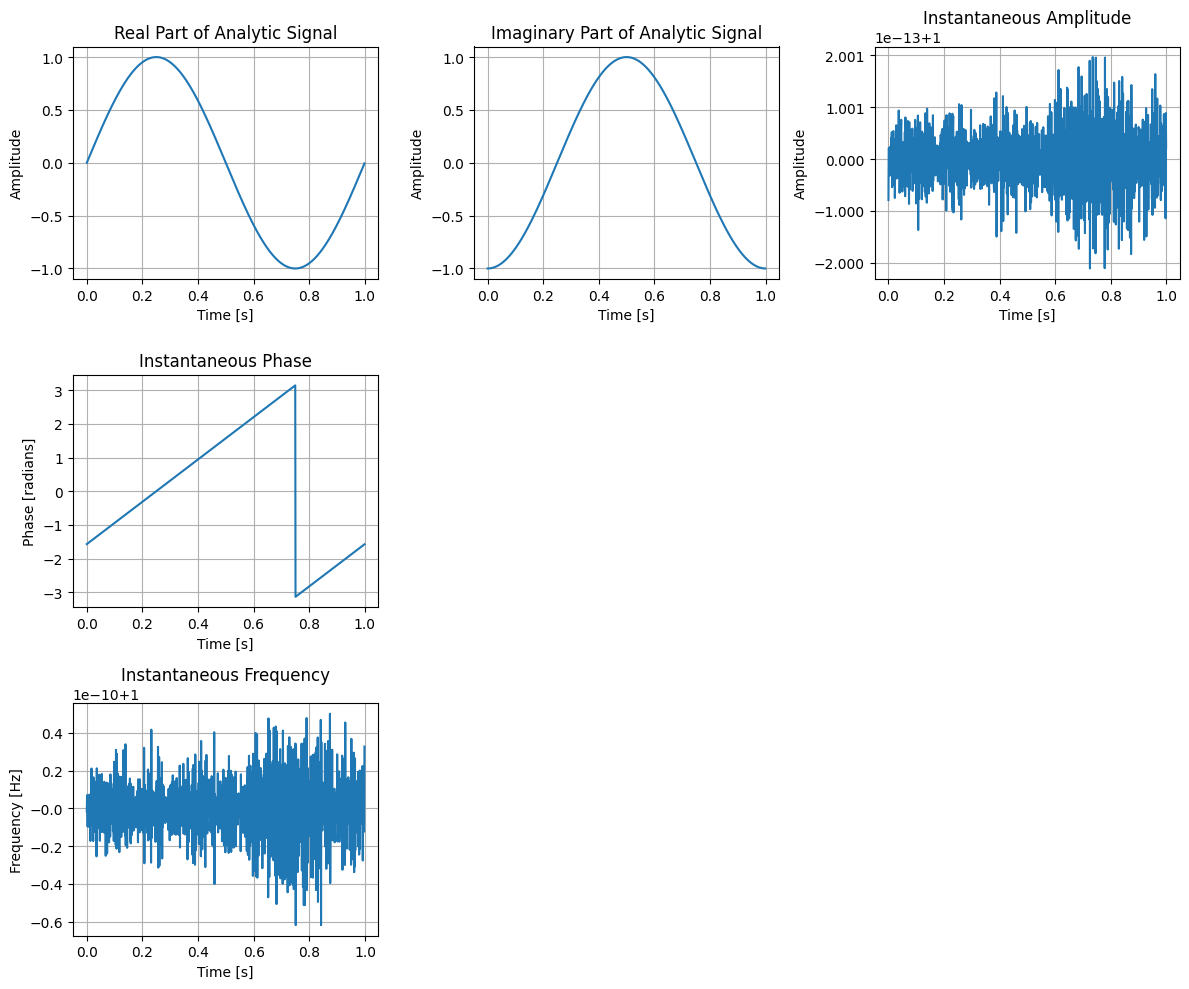

In [27]:
fig, ax = plt.subplots(3, 3, figsize=(12, 10))
ax[0, 0].plot(t, z_real)
ax[0, 0].set_title('Real Part of Analytic Signal')
ax[0, 0].set_xlabel('Time [s]')
ax[0, 0].set_ylabel('Amplitude')
ax[0, 0].grid()

ax[0, 1].plot(t, z_imag)
ax[0, 1].set_title('Imaginary Part of Analytic Signal')
ax[0, 1].set_xlabel('Time [s]')
ax[0, 1].set_ylabel('Amplitude')
ax[0, 1].grid()

ax[0, 2].plot(t, instantaneous_amplitude)
ax[0, 2].set_title('Instantaneous Amplitude')
ax[0, 2].set_xlabel('Time [s]')
ax[0, 2].set_ylabel('Amplitude')
ax[0, 2].grid()

ax[1, 0].plot(t, instantaneous_phase)
ax[1, 0].set_title('Instantaneous Phase')
ax[1, 0].set_xlabel('Time [s]')
ax[1, 0].set_ylabel('Phase [radians]')
ax[1, 0].grid()
ax[1, 1].axis('off')
ax[1, 2].axis('off')

ax[2, 0].plot(t[:-1], instantaneous_frequency)
ax[2, 0].set_title('Instantaneous Frequency')
ax[2, 0].set_xlabel('Time [s]')
ax[2, 0].set_ylabel('Frequency [Hz]')
ax[2, 0].grid()
ax[2, 1].axis('off')
ax[2, 2].axis('off')

plt.tight_layout()
plt.show()

# Part III: Complex Plane and Multiple Frequencies

## Q5.
- Plot the analytic signal z[n] in the complex plane using:
    - a 2D scatter of Re(z) vs Im(z)
    - a 3D plot showing evolution over time
- Color code points using a rainbow colormap

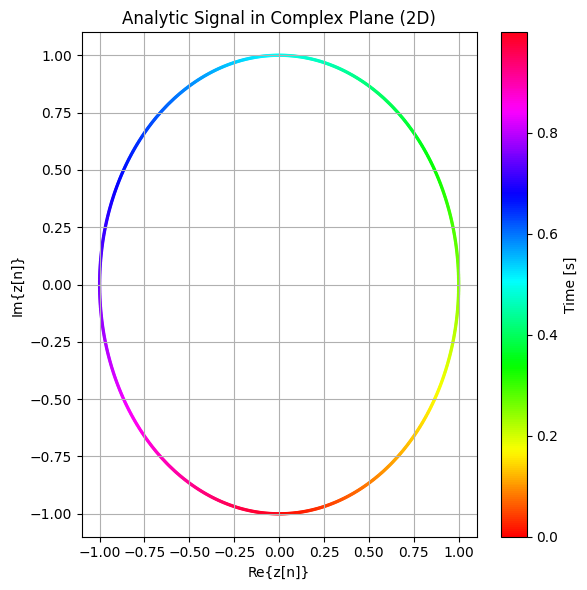

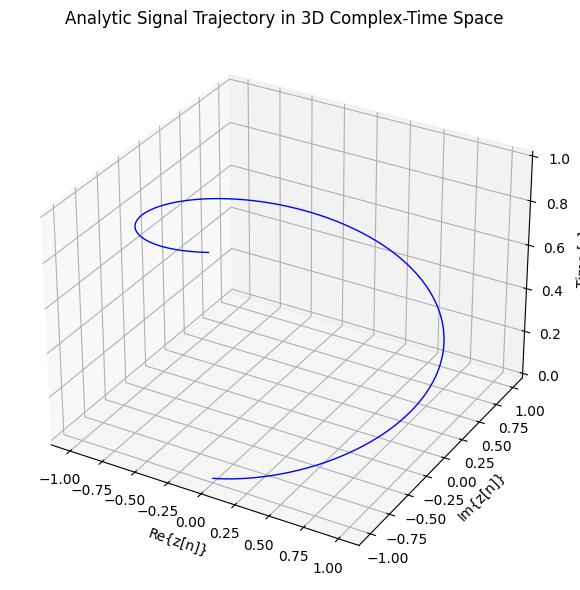

In [28]:
# 2D complex plane scatter: Re vs Im
plt.figure(figsize=(6, 6))
plt.scatter(np.real(z), np.imag(z), c=t, cmap='hsv', s=2)
plt.title("Analytic Signal in Complex Plane (2D)")
plt.xlabel("Re{z[n]}")
plt.ylabel("Im{z[n]}")
plt.grid()
plt.colorbar(label='Time [s]')
plt.tight_layout()
plt.show()

# 3D complex-time trajectory
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(np.real(z), np.imag(z), t, color='blue', linewidth=1)
ax.set_title("Analytic Signal Trajectory in 3D Complex-Time Space")
ax.set_xlabel("Re{z[n]}")
ax.set_ylabel("Im{z[n]}")
ax.set_zlabel("Time [s]")
ax.grid()
plt.tight_layout()
plt.show()


## Q6.
- Generate a signal with 2 sine components:
    - x[n] = sin(2π·f1·n/fs) + sin(2π·f2·n/fs) where f1 = 3 Hz, f2 = 7 Hz
- Repeat Q2–Q5 using this x[n]

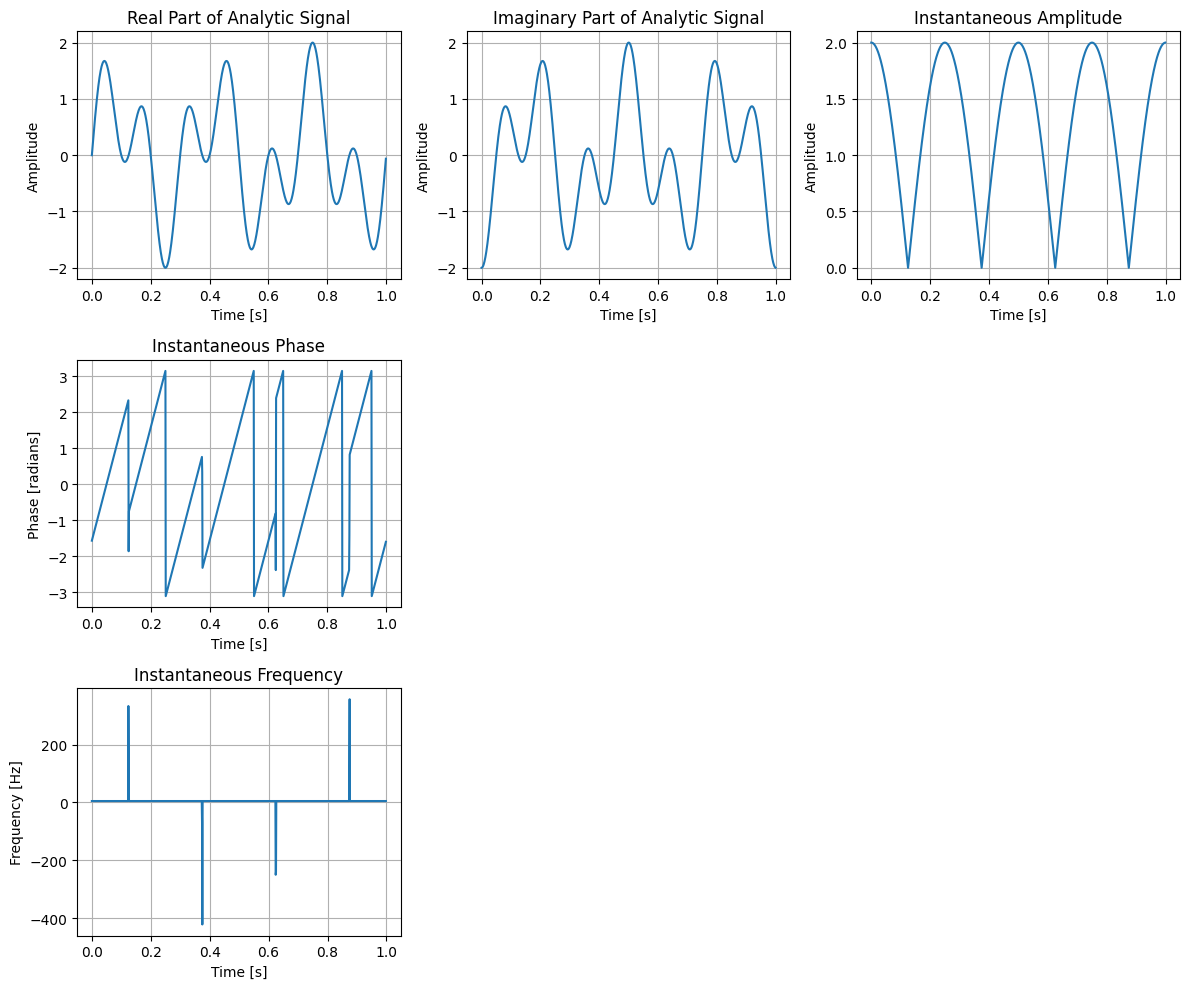

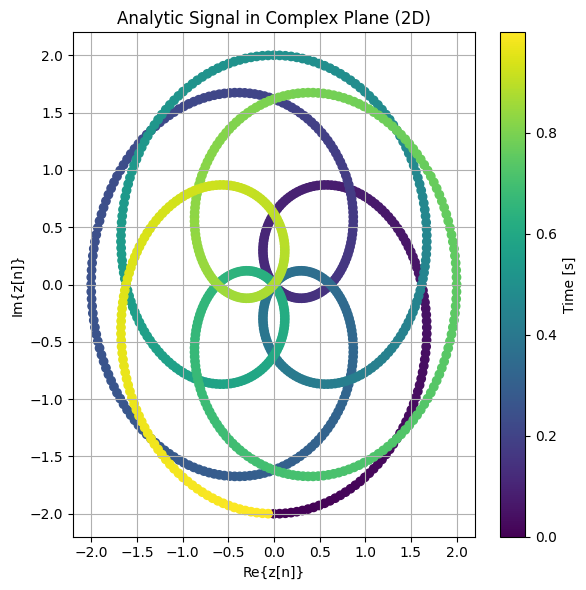

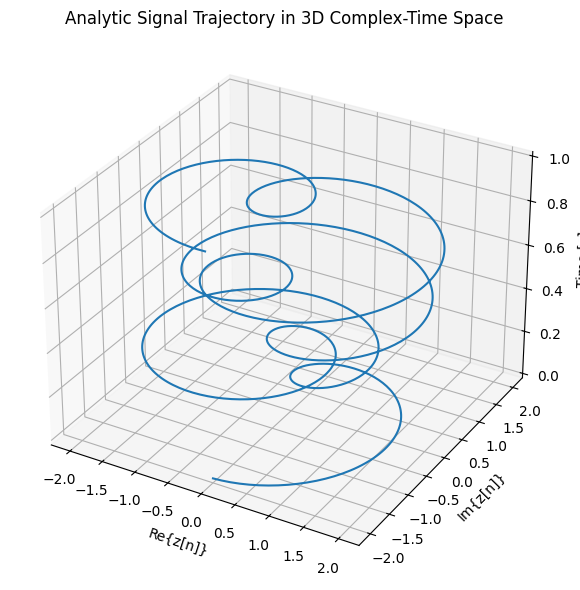

In [29]:
f1 = 3
f2 = 7
fs = 1000
T = 1
N = fs * T
n = np.arange(N)
t = n / fs

x = np.sin(2 * np.pi * f1 * n / fs) + np.sin(2 * np.pi * f2 * n / fs)

z = analytic_signal(x)
z_real = np.real(z)
z_imag = np.imag(z)
instantaneous_amplitude = np.abs(z)
instantaneous_phase = np.angle(z)
instantaneous_frequency = np.diff(np.unwrap(instantaneous_phase)) / (2 * np.pi) * fs

fig, ax = plt.subplots(3, 3, figsize=(12, 10))
ax[0, 0].plot(t, z_real)
ax[0, 0].set_title('Real Part of Analytic Signal')
ax[0, 0].set_xlabel('Time [s]')
ax[0, 0].set_ylabel('Amplitude')
ax[0, 0].grid()

ax[0, 1].plot(t, z_imag)
ax[0, 1].set_title('Imaginary Part of Analytic Signal')
ax[0, 1].set_xlabel('Time [s]')
ax[0, 1].set_ylabel('Amplitude')
ax[0, 1].grid()

ax[0, 2].plot(t, instantaneous_amplitude)
ax[0, 2].set_title('Instantaneous Amplitude')
ax[0, 2].set_xlabel('Time [s]')
ax[0, 2].set_ylabel('Amplitude')
ax[0, 2].grid()

ax[1, 0].plot(t, instantaneous_phase)
ax[1, 0].set_title('Instantaneous Phase')
ax[1, 0].set_xlabel('Time [s]')
ax[1, 0].set_ylabel('Phase [radians]')
ax[1, 0].grid()
ax[1, 1].axis('off')
ax[1, 2].axis('off')

ax[2, 0].plot(t[:-1], instantaneous_frequency)
ax[2, 0].set_title('Instantaneous Frequency')
ax[2, 0].set_xlabel('Time [s]')
ax[2, 0].set_ylabel('Frequency [Hz]')
ax[2, 0].grid()
ax[2, 1].axis('off')
ax[2, 2].axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(np.real(z), np.imag(z), c=t)
plt.title("Analytic Signal in Complex Plane (2D)")
plt.xlabel("Re{z[n]}")
plt.ylabel("Im{z[n]}")
plt.grid()
plt.colorbar(label='Time [s]')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(np.real(z), np.imag(z), t)
ax.set_title("Analytic Signal Trajectory in 3D Complex-Time Space")
ax.set_xlabel("Re{z[n]}")
ax.set_ylabel("Im{z[n]}")
ax.set_zlabel("Time [s]")
ax.grid()

plt.tight_layout()
plt.show()


## Q7.
- Generate a signal composed of 6 frequency components (e.g. [0.3, 1.9, 3, 11, 17, 31] Hz)
- Repeat Q2–Q5 and comment on how phase and frequency behave.

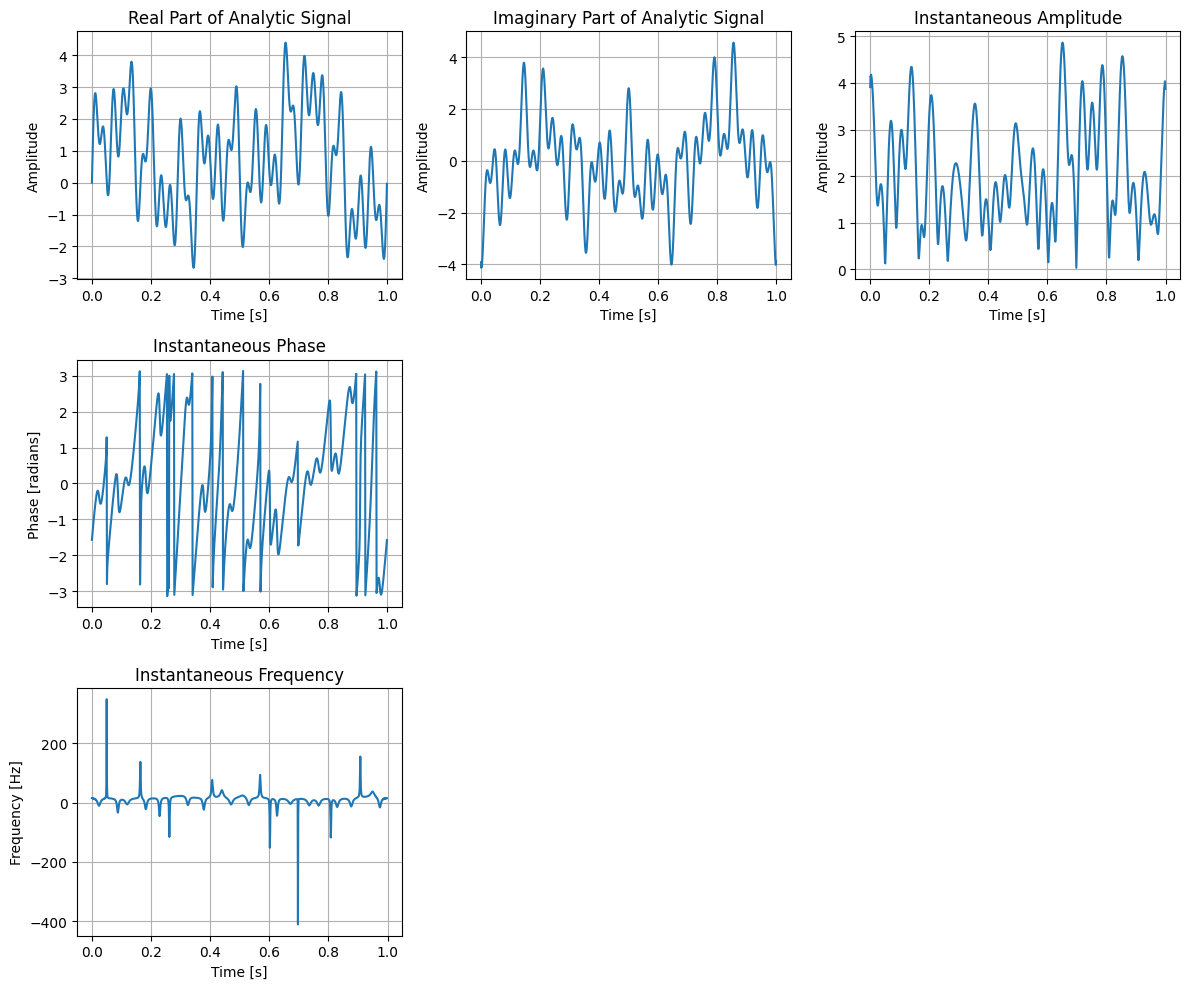

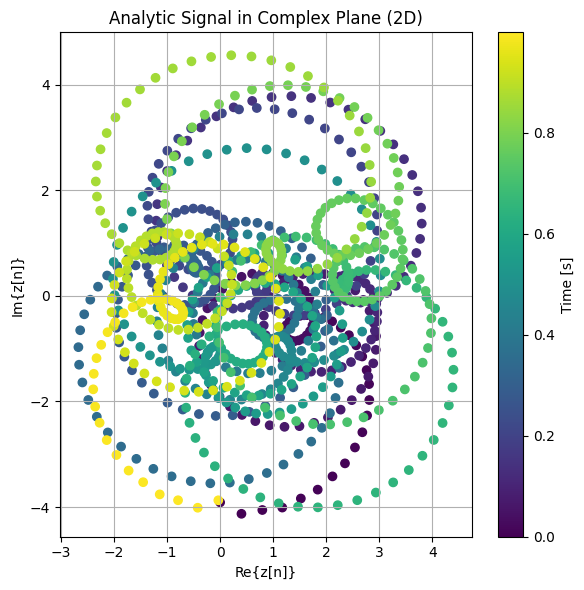

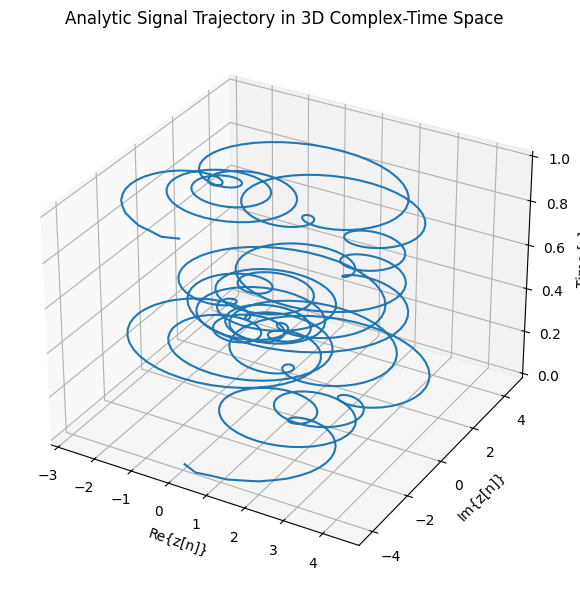

In [30]:
f_composed = [0.3, 1.9, 3, 11, 17, 31]

fs = 1000
T = 1
N = fs * T
n = np.arange(N)
t = n / fs

x = np.zeros(N)

for f in f_composed:
    x += np.sin(2 * np.pi * f * n / fs)

z = analytic_signal(x)
z_real = np.real(z)
z_imag = np.imag(z)
instantaneous_amplitude = np.abs(z)
instantaneous_phase = np.angle(z)
instantaneous_frequency = np.diff(np.unwrap(instantaneous_phase)) / (2 * np.pi) * fs

fig, ax = plt.subplots(3, 3, figsize=(12, 10))
ax[0, 0].plot(t, z_real)
ax[0, 0].set_title('Real Part of Analytic Signal')
ax[0, 0].set_xlabel('Time [s]')
ax[0, 0].set_ylabel('Amplitude')
ax[0, 0].grid()
ax[0, 1].plot(t, z_imag)
ax[0, 1].set_title('Imaginary Part of Analytic Signal')
ax[0, 1].set_xlabel('Time [s]')
ax[0, 1].set_ylabel('Amplitude')
ax[0, 1].grid()
ax[0, 2].plot(t, instantaneous_amplitude)
ax[0, 2].set_title('Instantaneous Amplitude')
ax[0, 2].set_xlabel('Time [s]')
ax[0, 2].set_ylabel('Amplitude')
ax[0, 2].grid()
ax[1, 0].plot(t, instantaneous_phase)
ax[1, 0].set_title('Instantaneous Phase')
ax[1, 0].set_xlabel('Time [s]')
ax[1, 0].set_ylabel('Phase [radians]')
ax[1, 0].grid()
ax[1, 1].axis('off')
ax[1, 2].axis('off')
ax[2, 0].plot(t[:-1], instantaneous_frequency)
ax[2, 0].set_title('Instantaneous Frequency')
ax[2, 0].set_xlabel('Time [s]')
ax[2, 0].set_ylabel('Frequency [Hz]')
ax[2, 0].grid()
ax[2, 1].axis('off')
ax[2, 2].axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(np.real(z), np.imag(z), c=t)
plt.title("Analytic Signal in Complex Plane (2D)")
plt.xlabel("Re{z[n]}")
plt.ylabel("Im{z[n]}")
plt.grid()
plt.colorbar(label='Time [s]')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(np.real(z), np.imag(z), t)
ax.set_title("Analytic Signal Trajectory in 3D Complex-Time Space")
ax.set_xlabel("Re{z[n]}")
ax.set_ylabel("Im{z[n]}")
ax.set_zlabel("Time [s]")
ax.grid()
plt.tight_layout()
plt.show()

# Part IV: Amplitude & Frequency Modulation

## Q8.
- Generate an amplitude-modulated signal using:
    - Carrier: sin(2π·fc·n/fs), fc = 30 Hz
    - Modulator: xm = sin(2π·fm·n/fs), fm = 0.5 Hz
    - x_am[n] = xm[n] · xc[n]
- Plot x_am[n], its analytic signal, and the extracted envelope.

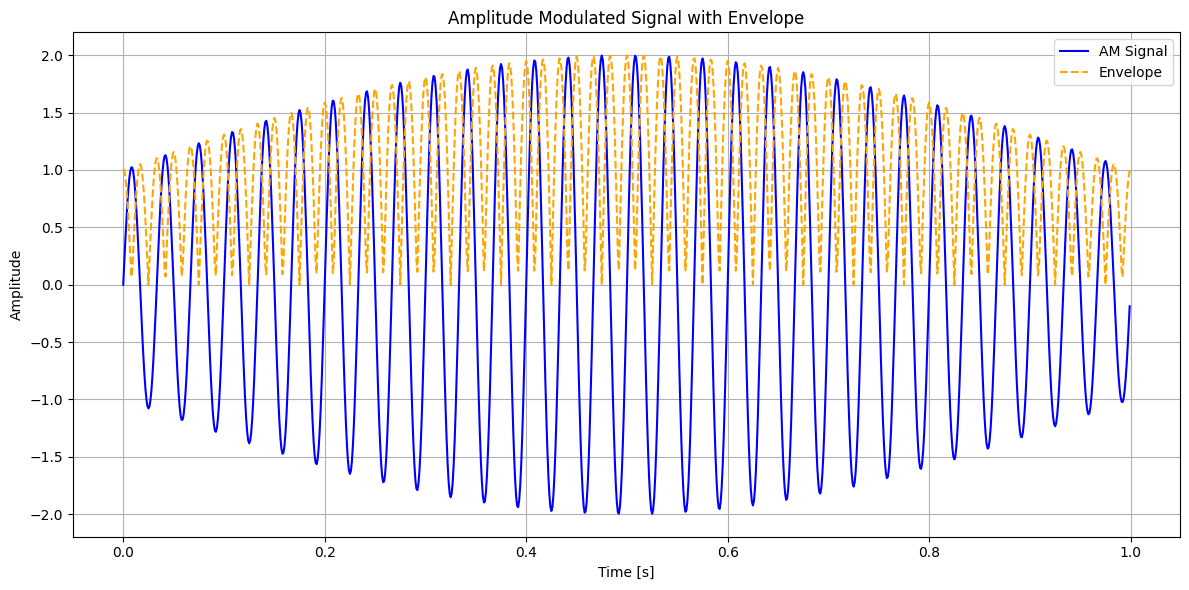

In [31]:
from scipy.fftpack import hilbert

carrier_freq = 30
carrier = np.sin(2 * np.pi * carrier_freq * n / fs)

fm = 0.5
x = np.sin(2 * np.pi * fm * n / fs)

x_am = (1 + x) * carrier

analytic_signal = hilbert(x_am)
envelope = np.abs(analytic_signal)

plt.figure(figsize=(12, 6))
plt.plot(t, x_am, label='AM Signal', color='blue')
plt.plot(t, envelope, label='Envelope', color='orange', linestyle='--')
plt.title('Amplitude Modulated Signal with Envelope')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Q9.
- Generate a frequency-modulated signal:
    - fc = 50 Hz, xm = sin(2π·fm·n/fs), fm = 4 Hz
    - x_fm[n] = sin(2π(fc·t + mf·xm[n])), mf = 1
- Compute and plot its instantaneous frequency.
- Compare with the original modulator signal xm[n].

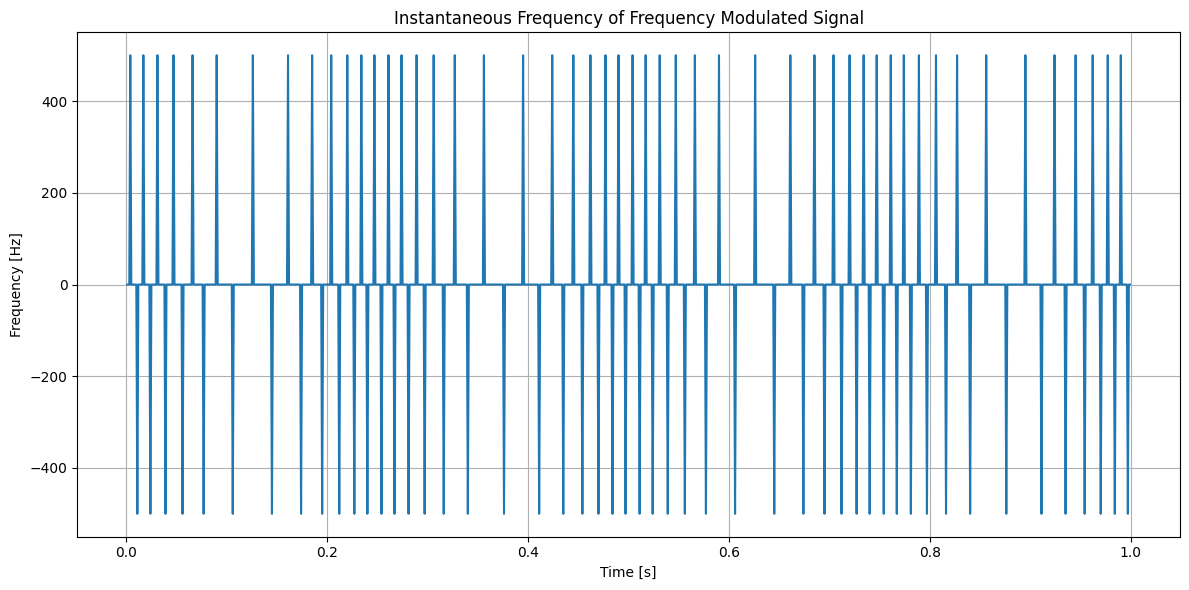

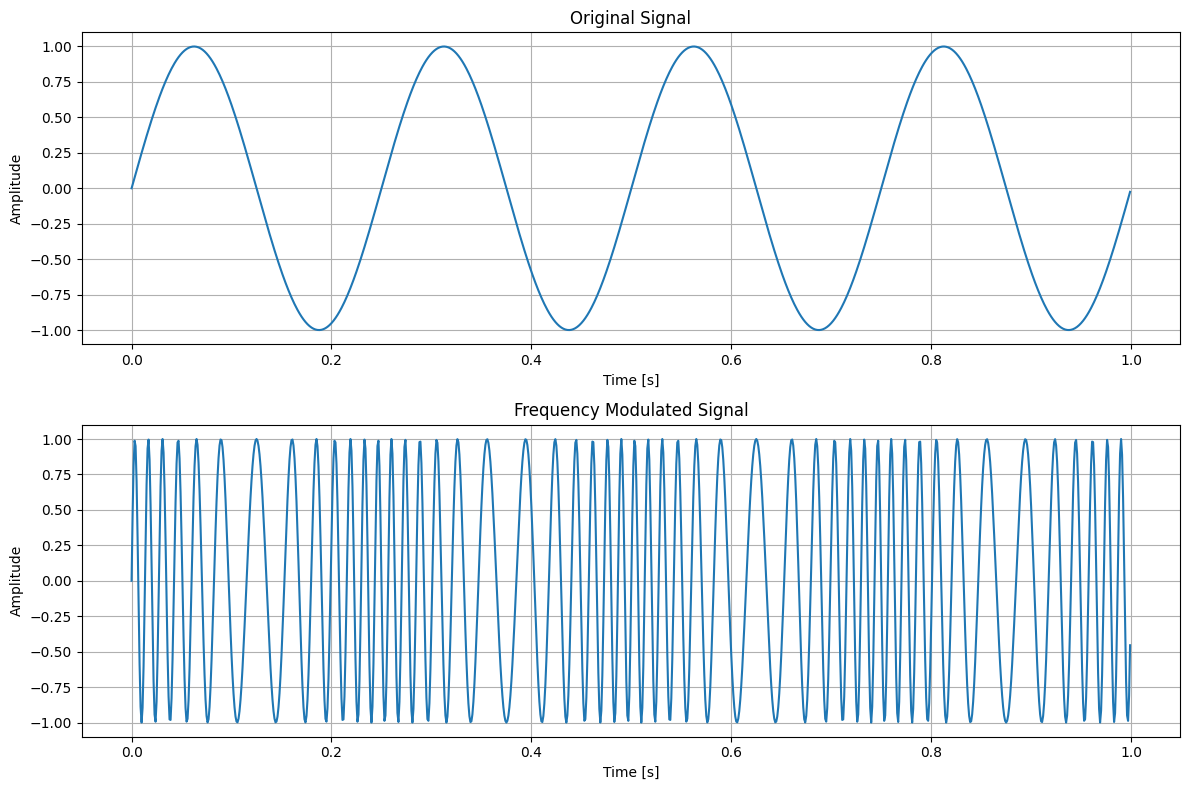

In [32]:
fs = 1000
T = 1
N = fs * T
n = np.arange(N)
t = n / fs

fc = 50
fm = 4
mf = 1

x = np.sin(2 * np.pi * fm * n / fs)

xm = np.sin(2 * np.pi * (fc * t + mf * x)) 

analytic_signal = hilbert(xm)
envelope = np.abs(analytic_signal)

instantaneous_phase = np.angle(analytic_signal)

instantaneous_frequency = np.diff(np.unwrap(instantaneous_phase)) / (2 * np.pi) * fs

plt.figure(figsize=(12, 6))
plt.plot(t[1:], instantaneous_frequency)
plt.title('Instantaneous Frequency of Frequency Modulated Signal')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.grid()
plt.tight_layout()
plt.show()

# Original signal vs modulated signal
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(t, x)
ax[0].set_title('Original Signal')
ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Amplitude')
ax[0].grid()

ax[1].plot(t, xm)
ax[1].set_title('Frequency Modulated Signal')
ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Amplitude')
ax[1].grid()

plt.tight_layout()
plt.show()

## Q10.
- Demodulate x_fm[n] by computing:
    - inst_freq = diff(unwrap(angle(z[n]))) / (2π) * fs
    - xm_demod = cumulative sum of (inst_freq - fc) * (1/fs) / mf
- Plot xm_demod and compare it to xm[n]

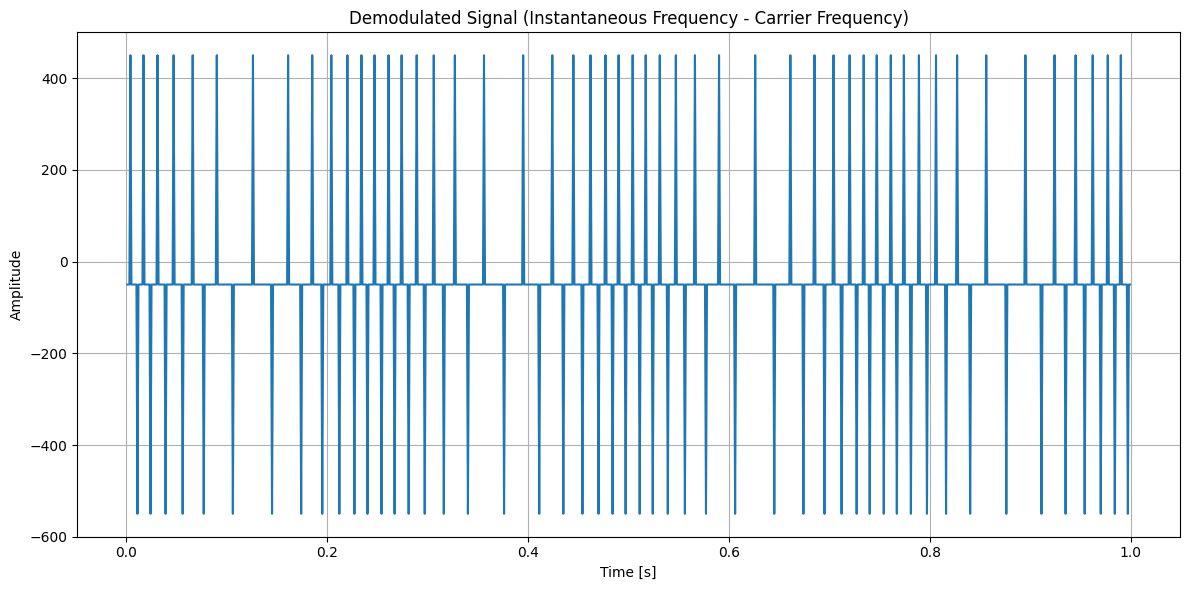

In [33]:
x_demodulated = instantaneous_frequency - fc

plt.figure(figsize=(12, 6))
plt.plot(t[1:], x_demodulated)
plt.title('Demodulated Signal (Instantaneous Frequency - Carrier Frequency)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Topic 4: Short-Time Fourier Transform (STFT)
# ---------------------------------------------

# Part I: STFT Implementation and Visualization

## Q1.
## Generate a synthetic signal composed of 3 sinusoids with changing frequencies:
    - 0–1s: 5 Hz
    - 1–2s: 15 Hz
    - 2–3s: 30 Hz
- Sample at fs = 100 Hz. Use np.arange to define the time axis and concatenate the parts.
- Plot the full signal in the time domain.

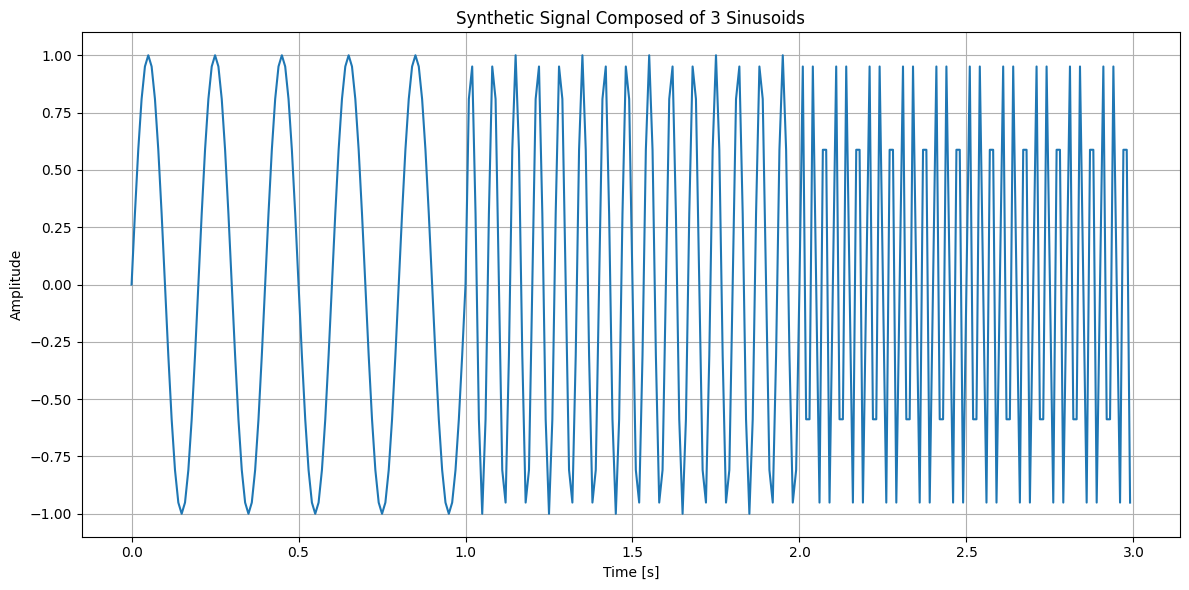

In [34]:
fs = 100
f1 = 5
f2 = 15
f3 = 30

T = 3
N = fs * T
n = np.arange(N)
t = n / fs

x = np.zeros(N)

for i in range(N):
    if i < fs:
        x[i] = np.sin(2 * np.pi * f1 * t[i])
    elif i < 2 * fs:
        x[i] = np.sin(2 * np.pi * f2 * t[i])
    else:
        x[i] = np.sin(2 * np.pi * f3 * t[i])

plt.figure(figsize=(12, 6))
plt.plot(t, x)
plt.title('Synthetic Signal Composed of 3 Sinusoids')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()
plt.show()

## Q2.
- Implement your own STFT function:
    - def stft(x, window_size, hop_size):
    - ...
- Use:
    - Windowing (Hann window)
    - 50% overlap
    - Compute magnitude of FFT for each segment
- Return: 2D array (frames × freqs)

In [35]:
import numpy as np
from scipy.signal.windows import hann

def stft(x, window_size, hop_size):
    window = hann(window_size)
    num_frames = 1 + (len(x) - window_size) // hop_size
    stft_matrix = []

    for i in range(num_frames):
        start = i * hop_size
        end = start + window_size
        segment = x[start:end]
        windowed_segment = segment * window
        spectrum = np.fft.fft(windowed_segment)
        magnitude = (1 / window_size) * np.abs(spectrum[:window_size // 2])
        stft_matrix.append(magnitude)

    return np.array(stft_matrix)

## Q3.
- Apply your STFT to the signal from Q1.
- Use a window size of 128 samples and hop size of 64.
- Use matplotlib’s imshow to visualize the STFT result as a log-magnitude spectrogram:
    - Time on x-axis, frequency on y-axis
    - Use plt.imshow(..., aspect='auto', origin='lower', cmap='magma')
    - Add colorbar, axis labels (time [s], frequency [Hz])

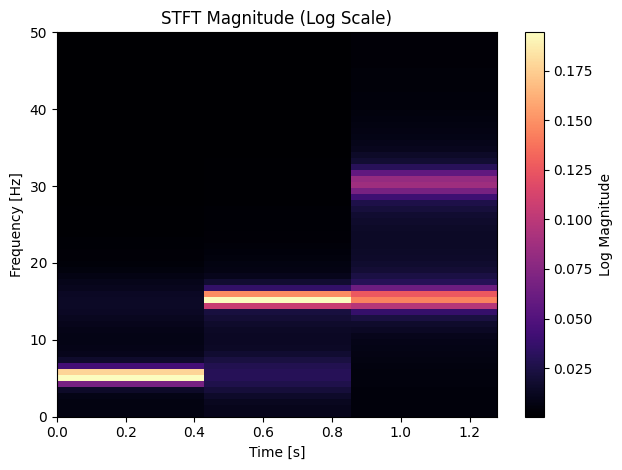

In [36]:
window_size = 128
hop_size = 64
stft_result = stft(x, window_size, hop_size)
time_axis = np.arange(stft_result.shape[0]) * (hop_size / fs)
extent = [0, time_axis[-1], 0, fs / 2]

plt.imshow(np.log1p(stft_result.T), aspect='auto', origin='lower', cmap='magma', extent=extent)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('STFT Magnitude (Log Scale)')
plt.colorbar(label='Log Magnitude')
plt.tight_layout()
plt.show()

# Part II: Real Signal (Speech)

## Q4.
- Load the speech signal from `./audio/speech.wav` and normalize it.
- Apply your STFT function to this signal with:
    - fs = 8000 Hz
    - window size = 512
    - hop size = 128
- Plot the log-magnitude spectrogram (as in Q3).
- Add appropriate axis labels and colorbar.

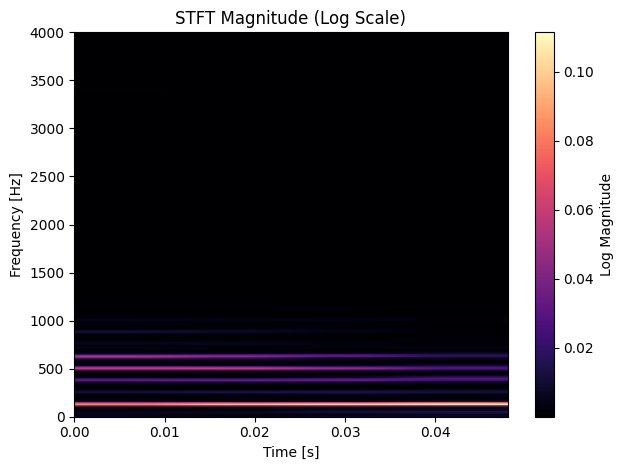

In [37]:
import scipy.io.wavfile as wav

fs, x = wav.read('./audio/speech.wav')
x = x / np.max(np.abs(x))

window_size = 512
hop_size = 128

stft_result = stft(x, window_size, hop_size)

time_axis = np.arange(stft_result.shape[0]) * (hop_size / fs)
extent = [0, time_axis[-1], 0, fs / 2]

plt.imshow(np.log1p(stft_result.T), aspect='auto', origin='lower', cmap='magma', extent=extent)
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('STFT Magnitude (Log Scale)')
plt.colorbar(label='Log Magnitude')
plt.tight_layout()
plt.show()

# Part III: Spectrogram Properties

## Q5.
- Experiment with different window sizes (e.g. 128, 512, 1024) on the same speech signal.
- For each window size, plot the spectrogram in a subplot row (3 rows).
- Comment briefly on the time-frequency resolution trade-off you observe.

Skipped window size 1024: signal too short.


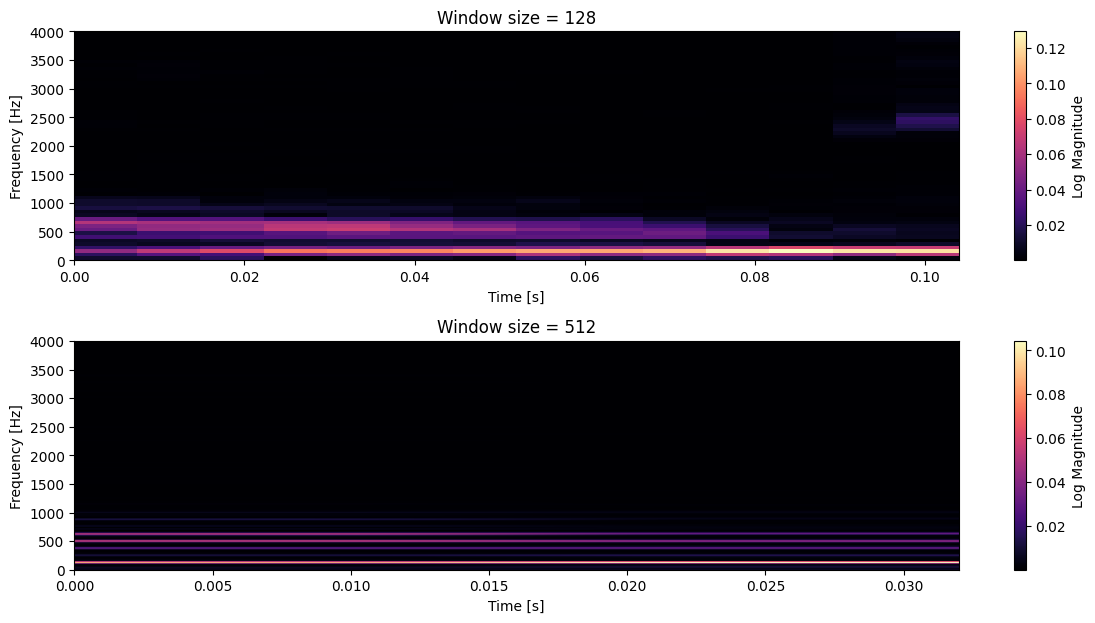

In [38]:
window_sizes = [128, 512, 1024]
hop_sizes = [w // 2 for w in window_sizes]
titles = ['Window size = 128', 'Window size = 512', 'Window size = 1024']

plt.figure(figsize=(12, 9))

for i, (w_size, h_size) in enumerate(zip(window_sizes, hop_sizes)):
    stft_result = stft(x, w_size, h_size)
    
    if stft_result.shape[0] == 0:
        print(f"Skipped window size {w_size}: signal too short.")
        continue

    time_axis = np.arange(stft_result.shape[0]) * (h_size / fs)
    extent = [0, time_axis[-1], 0, fs / 2]

    plt.subplot(3, 1, i+1)
    plt.imshow(np.log1p(stft_result.T), aspect='auto', origin='lower', cmap='magma', extent=extent)
    plt.title(f'Window size = {w_size}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.colorbar(label='Log Magnitude')

plt.tight_layout()
plt.show()

# Comment:
 - Small window (128): high time resolution, poor frequency resolution (blurry vertical bands)
 - Large window (1024): high frequency resolution, poor time resolution (blurry horizontal bands)
 - Medium window (512): balanced time-frequency trade-off

## Q6.
- Try different window types: 'hann', 'boxcar', 'hamming'
- Compare their visual effects on the spectrogram of the same speech signal.
- Plot all three results and briefly comment on leakage and main-lobe width.

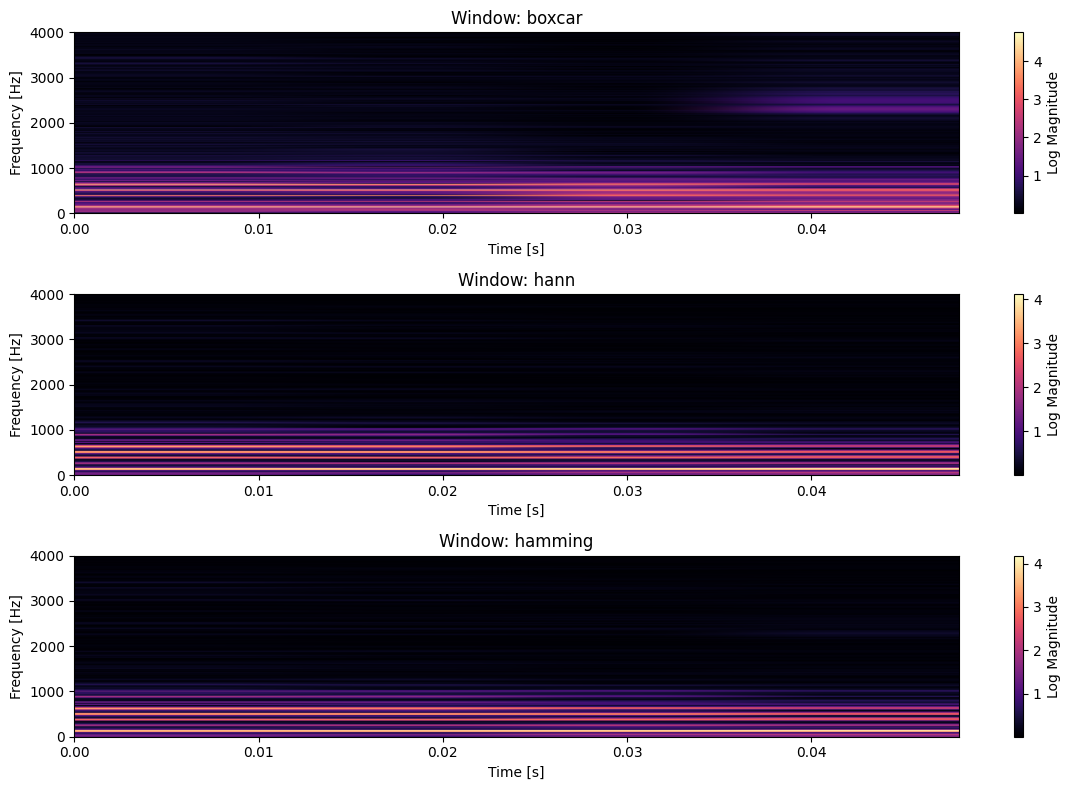

In [39]:
from scipy.signal.windows import hann, boxcar, hamming

def stft(x, window_size, hop_size, window_type):
    if window_type == 'hann':
        window = hann(window_size)
    elif window_type == 'boxcar':
        window = boxcar(window_size)
    elif window_type == 'hamming':
        window = hamming(window_size)
    else:
        raise ValueError("Invalid window type")
    
    num_frames = 1 + (len(x) - window_size) // hop_size
    stft_matrix = []

    for i in range(num_frames):
        start = i * hop_size
        end = start + window_size
        segment = x[start:end] * window
        spectrum = np.fft.fft(segment)
        magnitude = np.abs(spectrum[:window_size // 2])
        stft_matrix.append(magnitude)

    return np.array(stft_matrix)

window_size = 512
hop_size = 128
window_types = ['boxcar', 'hann', 'hamming']

plt.figure(figsize=(12, 8))

for i, wtype in enumerate(window_types):
    S = stft(x, window_size, hop_size, wtype)
    time_axis = np.arange(S.shape[0]) * (hop_size / fs)
    extent = [0, time_axis[-1], 0, fs / 2]

    plt.subplot(3, 1, i+1)
    plt.imshow(np.log1p(S.T), aspect='auto', origin='lower', cmap='magma', extent=extent)
    plt.title(f"Window: {wtype}")
    plt.xlabel('Time [s]')
    plt.ylabel('Frequency [Hz]')
    plt.colorbar(label='Log Magnitude')

plt.tight_layout()
plt.show()


# Part IV: Custom Features

## Q7.
- Compute the dominant frequency over time from the STFT by:
    - For each frame, take the index of the maximum magnitude
    - Convert the index to frequency in Hz
- Plot the dominant frequency trajectory over time.

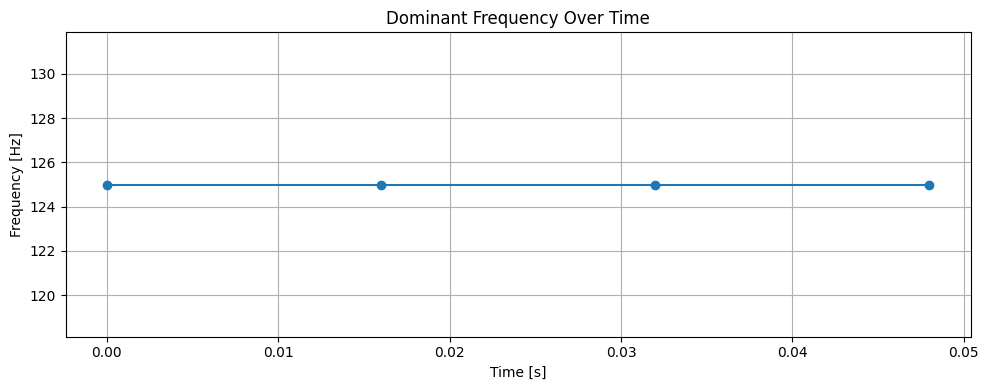

In [40]:
# Re-call STFT with the required window_type argument
stft_result = stft(x, window_size, hop_size, window_type='hann')
num_bins = stft_result.shape[1]

freq_axis = np.arange(num_bins) * fs / window_size
dominant_freq = freq_axis[np.argmax(stft_result, axis=1)]
time_axis = np.arange(len(dominant_freq)) * (hop_size / fs)

# Plot dominant frequency trajectory
plt.figure(figsize=(10, 4))
plt.plot(time_axis, dominant_freq, marker='o')
plt.title('Dominant Frequency Over Time')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.grid()
plt.tight_layout()
plt.show()


## Q8.
- Generate a signal with time-varying frequency sweep (chirp):
    - x[n] = sin(2π · f(t) · t), with f(t) sweeping from 5 Hz to 100 Hz over 3 seconds
- Use your STFT and plot the spectrogram. Compare it to the ground truth frequency curve.


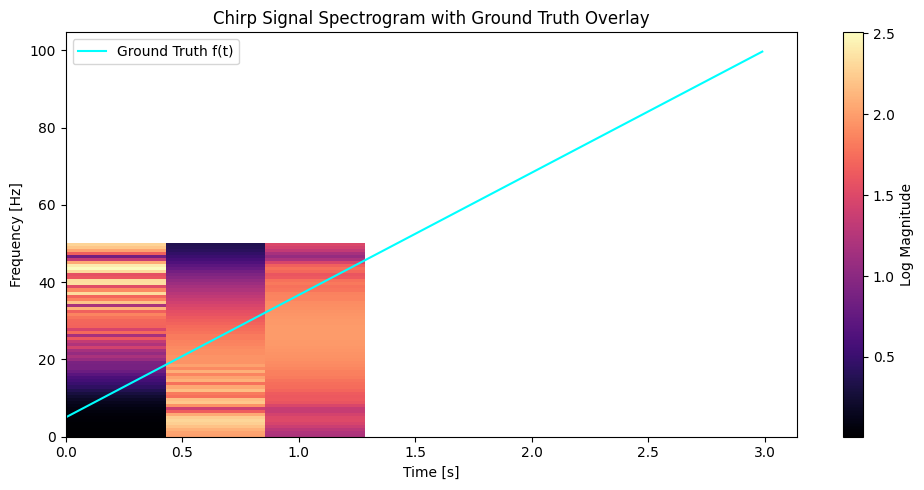

In [41]:
# Define time axis
fs = 100
T = 3
t = np.arange(0, T, 1/fs)

# Linear chirp from 5 Hz to 100 Hz
f0 = 5
f1 = 100
k = (f1 - f0) / T
f_t = f0 + k * t  # instantaneous frequency
x = np.sin(2 * np.pi * f_t * t)

# Compute STFT
window_size = 128
hop_size = 64
stft_result = stft(x, window_size, hop_size, window_type='hann')

# Time and frequency axes
time_axis = np.arange(stft_result.shape[0]) * (hop_size / fs)
freq_axis = np.arange(stft_result.shape[1]) * fs / window_size

# Plot spectrogram
plt.figure(figsize=(10, 5))
plt.imshow(np.log1p(stft_result.T), aspect='auto', origin='lower',
           extent=[0, time_axis[-1], 0, fs/2], cmap='magma')
plt.plot(t, f_t, color='cyan', label='Ground Truth f(t)')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title('Chirp Signal Spectrogram with Ground Truth Overlay')
plt.colorbar(label='Log Magnitude')
plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------------------------
# Topic 5: Sampling and Resampling
# ---------------------------------------------

# Part I: Fundamentals of Sampling

## Q1.
- Generate a continuous-time signal x(t) = sin(2π·f·t), where f = 5 Hz.
- Simulate it using a very high sampling frequency fs = 1000 Hz over 1 second.
- Plot the continuous version.

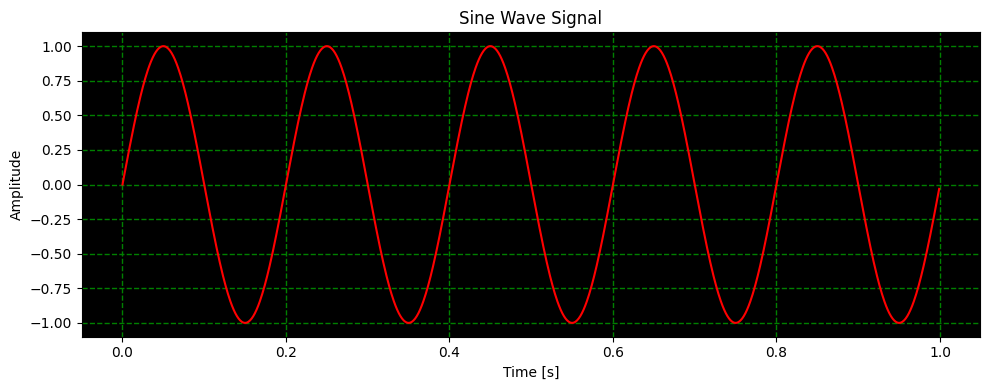

In [42]:
f = 5
fs = 1000
T = 1
t = np.arange(0, T, 1/fs)

x = np.sin(2 * np.pi * f * t)

plt.figure(figsize=(10, 4))
plt.plot(t, x, color='red')
plt.title('Sine Wave Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.gca().set_facecolor('black')
plt.grid(color='green', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

## Q2.
- Downsample x(t) by a factor of M = 4.
- Do this by keeping every M-th sample: x_down = x[::M]
- Plot the original and downsampled signals (time axis in seconds).
- Use stem plot for the downsampled version.

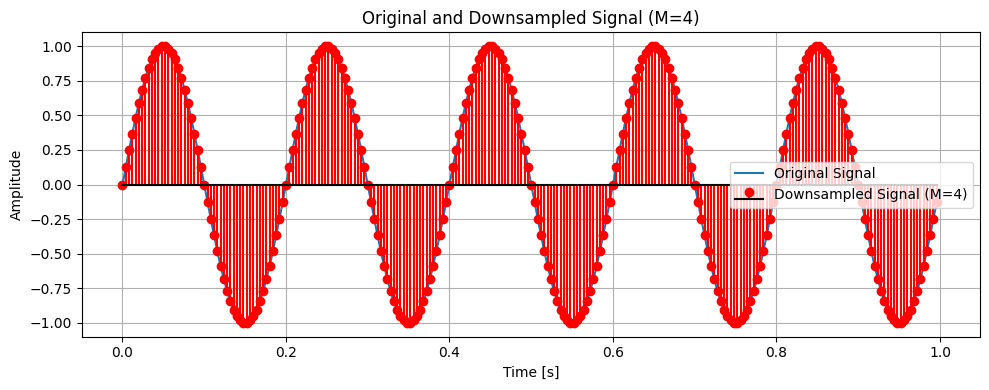

In [43]:
M = 4

x_down = x[::M]
t_down = t[::M]

plt.figure(figsize=(10, 4))

# Plot original signal
plt.plot(t, x, label='Original Signal')

# Stem plot for downsampled signal
plt.stem(t_down, x_down, linefmt='r-', markerfmt='ro', basefmt='k', label='Downsampled Signal (M=4)')

plt.title('Original and Downsampled Signal (M=4)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


## Q3.
- Upsample x[n] by a factor of L = 3 by inserting L−1 zeros between samples.
- Use np.zeros and slicing. Plot the result.
- What is the new sampling rate?

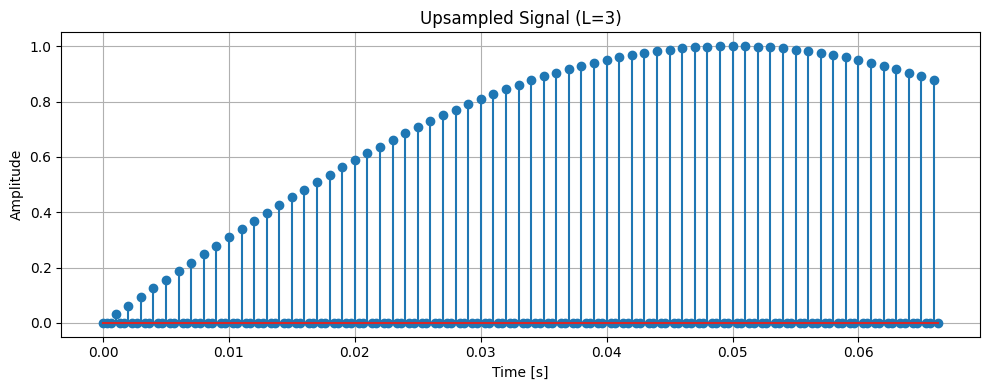

New sampling rate: 3000 Hz


In [44]:
L = 3 

x_up = np.zeros(len(x) * L)
x_up[::L] = x

fs_up = fs * L

t_up = np.arange(0, len(x_up)) / fs_up

plt.figure(figsize=(10, 4))
plt.stem(t_up[:200], x_up[:200])
plt.title('Upsampled Signal (L=3)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()
plt.show()

print("New sampling rate:", fs_up, "Hz")

# Part II: Frequency-Domain Effects

## Q4.
- Plot the magnitude spectrum (using FFT) of:
    - Original signal
    - Downsampled signal
    - Upsampled signal (zero-stuffed)
- Use physical units (Hz) on the frequency axis.
- Comment on aliasing and spectral stretching effects.

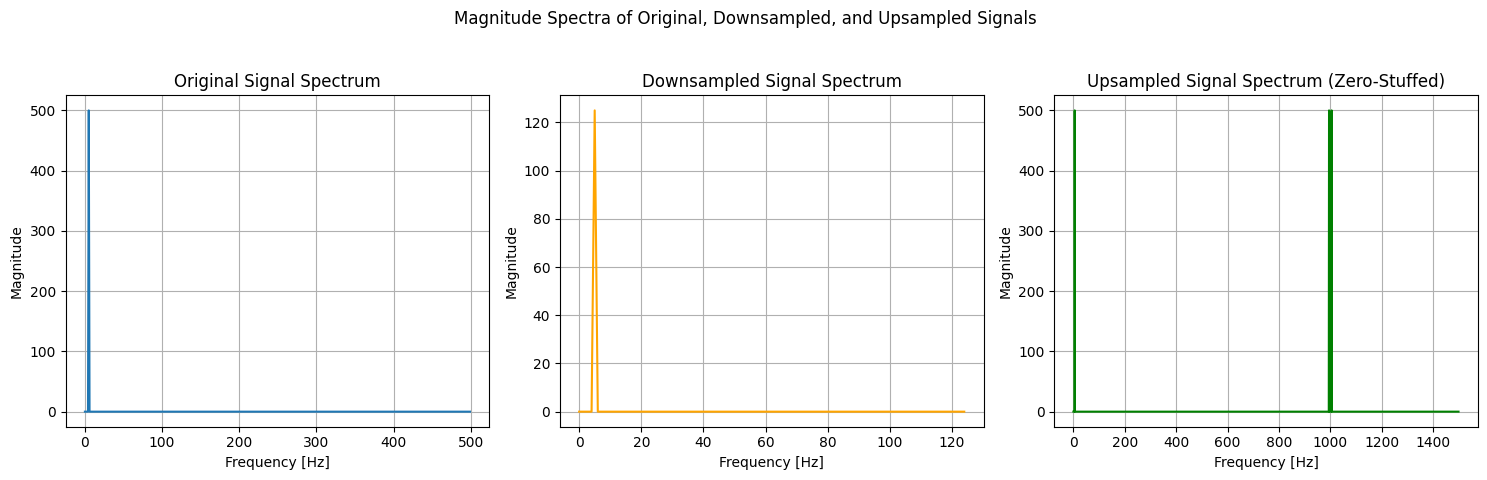

In [45]:
# FFTs
X = np.fft.fft(x)
X_down = np.fft.fft(x_down)
X_up = np.fft.fft(x_up)

# Frequencies (physical units)
f = np.fft.fftfreq(len(x), d=1/fs)
f_down = np.fft.fftfreq(len(x_down), d=1/(fs/4))  # fs/M
f_up = np.fft.fftfreq(len(x_up), d=1/(fs*3))      # fs*L

# Plot magnitude spectra
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle("Magnitude Spectra of Original, Downsampled, and Upsampled Signals")  

ax[0].plot(f[:len(f)//2], np.abs(X[:len(f)//2]), label='Original Signal')
ax[0].set_title("Original Signal Spectrum")
ax[0].set_xlabel("Frequency [Hz]")
ax[0].set_ylabel("Magnitude")
ax[0].grid()

ax[1].plot(f_down[:len(f_down)//2], np.abs(X_down[:len(f_down)//2]), label='Downsampled Signal', color='orange')
ax[1].set_title("Downsampled Signal Spectrum")
ax[1].set_xlabel("Frequency [Hz]")
ax[1].set_ylabel("Magnitude")
ax[1].grid()

ax[2].plot(f_up[:len(f_up)//2], np.abs(X_up[:len(f_up)//2]), label='Upsampled Signal', color='green')
ax[2].set_title("Upsampled Signal Spectrum (Zero-Stuffed)")
ax[2].set_xlabel("Frequency [Hz]")
ax[2].set_ylabel("Magnitude")
ax[2].grid()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Part III: Anti-Aliasing Filtering

## Q5.
- Before downsampling by M=4, apply a low-pass filter that keeps only frequencies below π/M.
- Use:
    - scipy.signal.firwin() to design LPF
    - scipy.signal.lfilter() to apply the filter
- Plot filtered signal vs unfiltered one and show the difference in spectra.

In [46]:
def ideal_lpf(cutoff_hz, fs, numtaps):
    n = np.arange(numtaps)
    middle = (numtaps - 1) / 2
    sinc_arg = 2 * cutoff_hz / fs * (n - middle)
    
    # Handle division by zero at center
    h = np.sinc(sinc_arg)
    
    # Apply Hann window
    window = np.hanning(numtaps)
    h = h * window
    
    # Normalize to unity gain at DC
    h = h / np.sum(h)
    
    return h

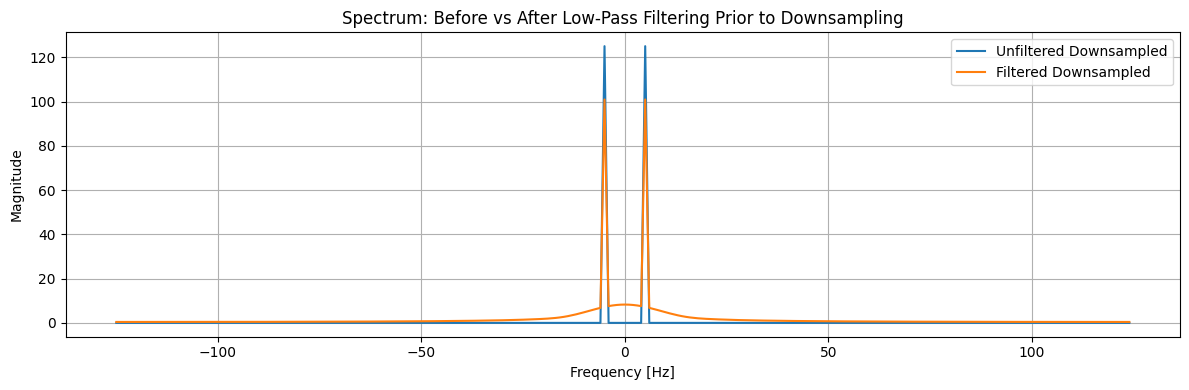

In [47]:
import scipy.signal as signal

M = 4
cutoff = 1 / M  # Normalized cutoff (Nyquist = 1)

numtaps = 100
lpf = ideal_lpf(cutoff, fs, numtaps)

x_filtered = signal.lfilter(lpf, 1.0, x)

x_down = x[::M]
x_filtered_down = x_filtered[::M]

N = len(x_down)
f = np.fft.fftfreq(N, d=1 / (fs // M))
f = np.fft.fftshift(f)

X_down = np.fft.fftshift(np.abs(np.fft.fft(x_down)))
X_filtered_down = np.fft.fftshift(np.abs(np.fft.fft(x_filtered_down)))

plt.figure(figsize=(12, 4))
plt.plot(f, X_down, label='Unfiltered Downsampled')
plt.plot(f, X_filtered_down, label='Filtered Downsampled')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Spectrum: Before vs After Low-Pass Filtering Prior to Downsampling')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Part IV: Rational Resampling (L/M)

## Q6.
- Define L = 3 and M = 2. Resample the original signal by a rational factor L/M.
- Steps:
    - Upsample by L (insert zeros)
    - Apply LPF (anti-imaging)
    - Downsample by M
- Plot the final result and compute its new sampling rate.

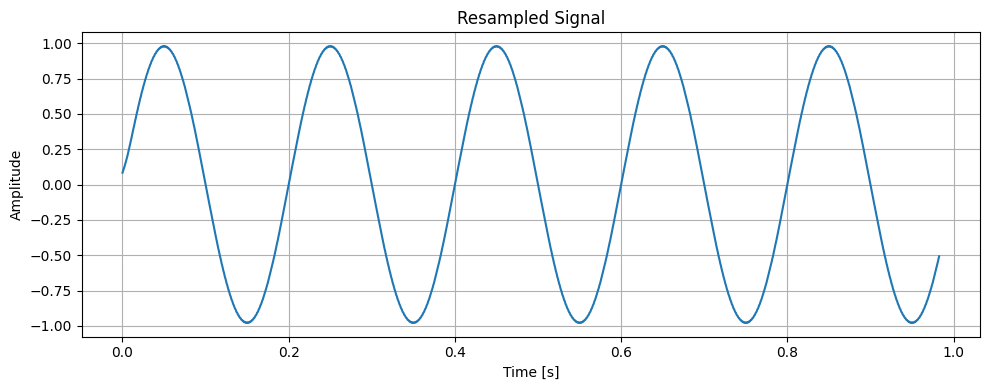

In [48]:
L = 3
M = 2
numtaps = 101
fs_new = fs * L / M

x_up = np.zeros(len(x) * L)
x_up[::L] = x

cutoff = 1 / max(L, M)
lpf = signal.firwin(numtaps, cutoff=cutoff, fs=fs * L)
lpf /= np.sum(lpf)

x_up_filtered = signal.lfilter(lpf, 1.0, x_up)

x_up_filtered = x_up_filtered[numtaps//2:]
x_resampled = x_up_filtered[::M] * L

t_resampled = np.arange(len(x_resampled)) / fs_new

plt.figure(figsize=(10, 4))
plt.plot(t_resampled, x_resampled)
plt.title('Resampled Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.tight_layout()
plt.show()

## Q7.
- Compare the final resampled signal to the version from scipy:
    - Use scipy.signal.resample_poly()
    - Plot both signals overlaid
    - Comment on the similarity and any differences.

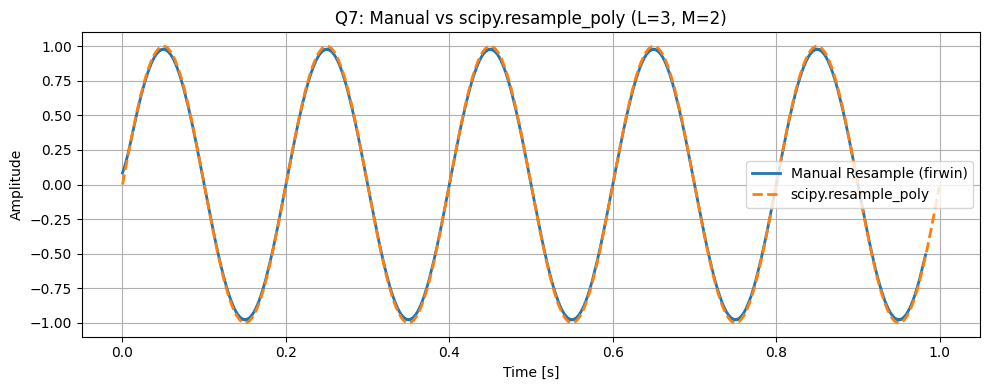

In [49]:
from scipy.signal import resample_poly

x_resampled_scipy = resample_poly(x, up=L, down=M)

t_resampled = np.arange(len(x_resampled)) / fs_new
t_scipy = np.arange(len(x_resampled_scipy)) / fs_new

plt.figure(figsize=(10, 4))
plt.plot(t_resampled, x_resampled, label='Manual Resample (firwin)', linewidth=2)
plt.plot(t_scipy, x_resampled_scipy, '--', label='scipy.resample_poly', linewidth=2)
plt.title(f'Q7: Manual vs scipy.resample_poly (L={L}, M={M})')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

✅ The two signals overlap almost perfectly.

🔍 Any small differences are due to filter design: scipy uses an internal Kaiser-window FIR.

🎯 Both achieve correct resampling with same time scale and frequency content.

# ---------------------------------------------
# Topic 6: Ideal Filter Design
# ---------------------------------------------

# Part I: Frequency-Domain Filter Construction

## Q1.
- Create an ideal low-pass filter in the frequency domain:
    - Sampling rate: fs = 1000 Hz
    - Signal length: N = 1024
    - Cutoff frequency: fc = 100 Hz
- Steps:
    - Create frequency axis using np.fft.fftfreq()
    - Define H[k] = 1 for |f| ≤ fc, else 0
- Plot H[k] (magnitude) vs frequency.

In [50]:
# fs = 1000
# N = 1024
# fc = 100
# n = np.arange(-N//2, N//2)
# 
# X = np.zeros(N)
# 
# freqs = np.fft.fftfreq(N, d=1/fs)
# X[np.abs(freqs) <= fc] = 1
# 
# X_shifted = np.fft.fftshift(X)
# 
# plt.figure(figsize=(8, 3))
# plt.plot(np.fft.fftshift(freqs), X_shifted)
# plt.title('Ideal LPF in Frequency Domain')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')
# plt.grid(True)
# plt.tight_layout()
# plt.show()
# 
# E = np.exp(2j * np.pi / N * np.outer(n, np.arange(N)))
# h = np.dot(X, E) / N
# 
# plt.figure(figsize=(8, 3))
# plt.plot(n, np.real(h))
# plt.title('Impulse Response h[n] (Real Part)')
# plt.xlabel('Time Index n')
# plt.ylabel('Amplitude')
# plt.grid(True)
# plt.tight_layout()
# plt.show()
# 
# w = np.linspace(-np.pi, np.pi, 1000)
# Ew = np.exp(-1j * np.outer(w, n))
# Hw = np.dot(Ew, h)
# 
# plt.figure(figsize=(8, 3))
# plt.plot(w, np.abs(Hw))
# plt.title('Magnitude Response of Designed Filter')
# plt.xlabel('Frequency (rad/sample)')
# plt.ylabel('Magnitude')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

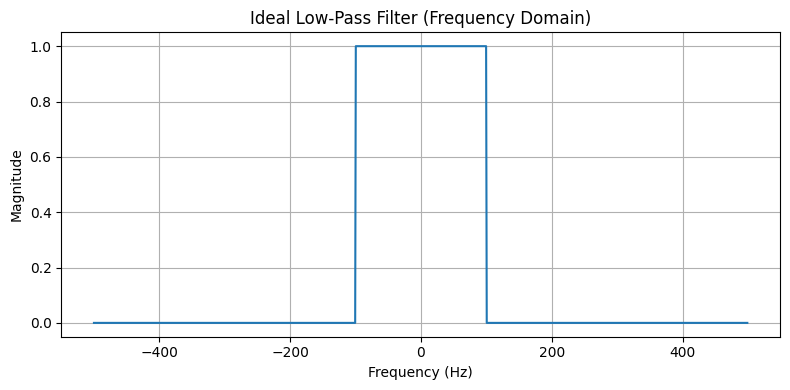

In [51]:
fs = 1000
N = 1024
fc = 100

f = np.fft.fftfreq(N, d=1/fs)

H = np.zeros(N)
H[np.abs(f) <= fc] = 1

plt.figure(figsize=(8, 4))
plt.plot(np.fft.fftshift(f), np.fft.fftshift(H))
plt.title('Ideal Low-Pass Filter (Frequency Domain)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.tight_layout()
plt.show()

## Q2.
- Apply inverse DFT to get the impulse response h[n] of the low-pass filter.
- Plot h[n] in the time domain.
- Comment on its symmetry and length.

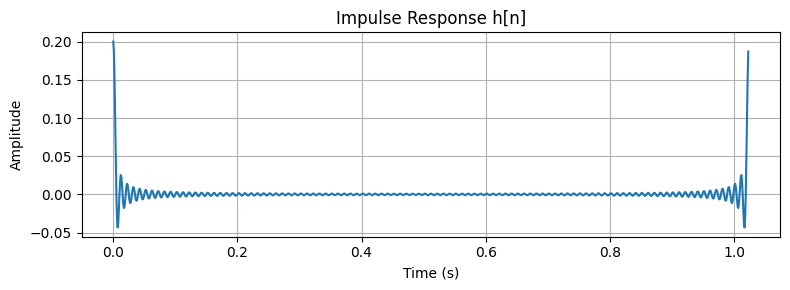

In [52]:
h = np.fft.ifft(H).real
t = np.arange(N) / fs

plt.figure(figsize=(8, 3))
plt.plot(t, h)
plt.title('Impulse Response h[n]')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# Part II: Signal Filtering in Frequency Domain

## Q3.
- Generate a signal x[n] = sin(2π·50·n/fs) + sin(2π·300·n/fs)
- Use fs = 1000 Hz and duration = 1 sec.
- Plot x[n] and its spectrum.

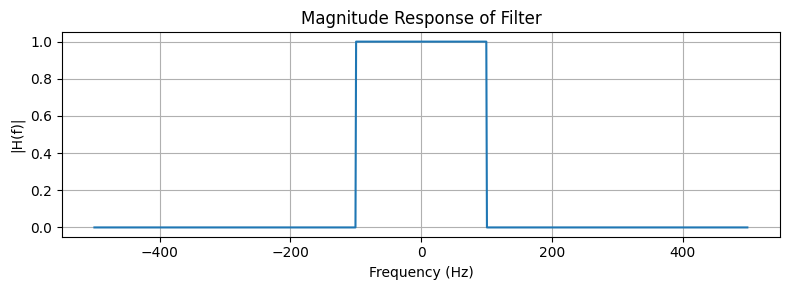

In [53]:
f = np.fft.fftfreq(N, d=1/fs)
f_shifted = np.fft.fftshift(f)

H_fft = np.fft.fft(h)
H_shifted = np.fft.fftshift(H_fft)

plt.figure(figsize=(8, 3))
plt.plot(f_shifted, np.abs(H_shifted))
plt.title('Magnitude Response of Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|H(f)|')
plt.grid()
plt.tight_layout()
plt.show()

## Q4.
- Apply your low-pass filter to x[n] using:
    - DFT of x[n]: X[k]
    - Multiply: Y[k] = X[k] · H[k]
    - iDFT to get y[n]
- Plot the filtered signal and its spectrum.
- Compare to original.

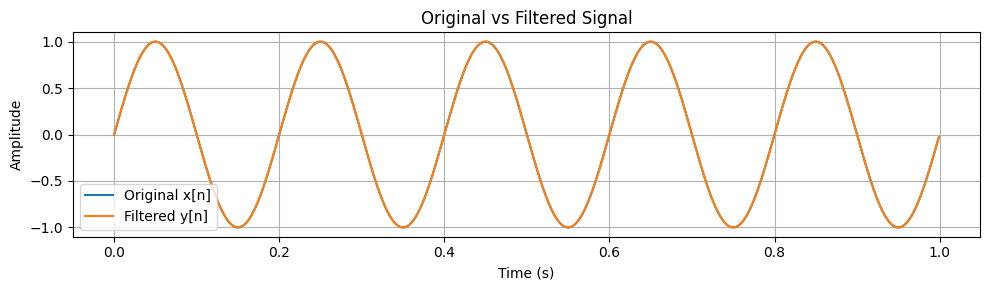

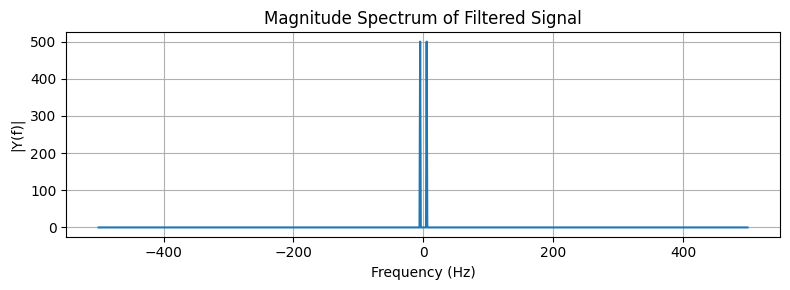

In [54]:
N_x = len(x)
f_x = np.fft.fftfreq(N_x, d=1/fs)

H_x = np.zeros(N_x)
H_x[np.abs(f_x) <= fc] = 1

X = np.fft.fft(x)

Y = X * H_x

y = np.fft.ifft(Y).real

t = np.arange(N_x) / fs

plt.figure(figsize=(10, 3))
plt.plot(t, x, label='Original x[n]')
plt.plot(t, y, label='Filtered y[n]')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original vs Filtered Signal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

f_plot = np.fft.fftshift(np.fft.fftfreq(N_x, d=1/fs))
Y_shifted = np.fft.fftshift(np.fft.fft(y))

plt.figure(figsize=(8, 3))
plt.plot(f_plot, np.abs(Y_shifted))
plt.title('Magnitude Spectrum of Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|Y(f)|')
plt.grid(True)
plt.tight_layout()
plt.show()

# Part III: High-Pass and Band Filters

## Q5.
- Construct an ideal high-pass filter in the frequency domain with:
    - fs = 1000 Hz
    - Cutoff frequency: 200 Hz
- Plot both time and frequency domain representations.

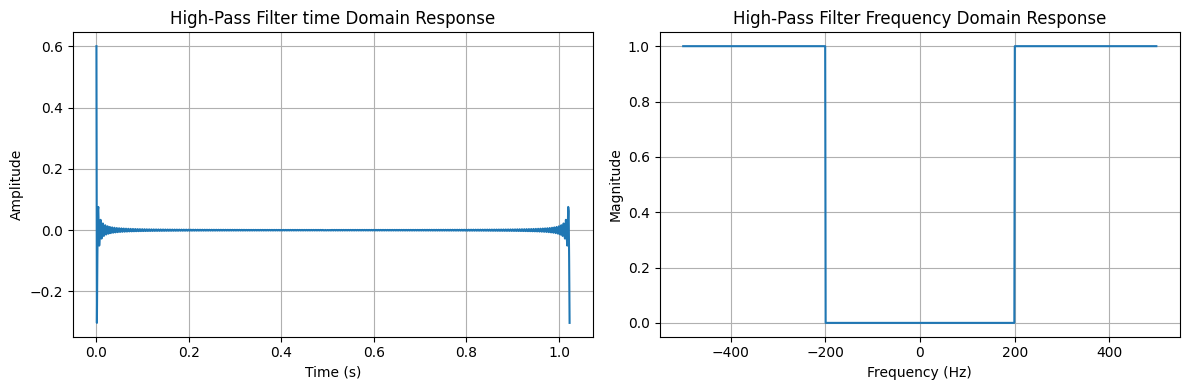

In [55]:
fs = 1000
N = 1024
fc = 200

f = np.fft.fftfreq(N, d=1/fs)

H_hp = np.zeros(N)
H_hp[np.abs(f) >= fc] = 1

h_hp = np.fft.ifft(H_hp).real
t = np.arange(N) / fs

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('High-Pass Filter time Domain Response')
ax[0].plot(t, h_hp)
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].grid()

ax[1].set_title('High-Pass Filter Frequency Domain Response')
ax[1].plot(np.fft.fftshift(f), np.fft.fftshift(np.abs(H_hp)))
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].grid()

plt.tight_layout()
plt.show()

## Q6.
- Design an ideal band-pass filter by combining low-pass and high-pass filters:
    - Passband: 100–300 Hz
- Plot the band-pass filter’s magnitude response.

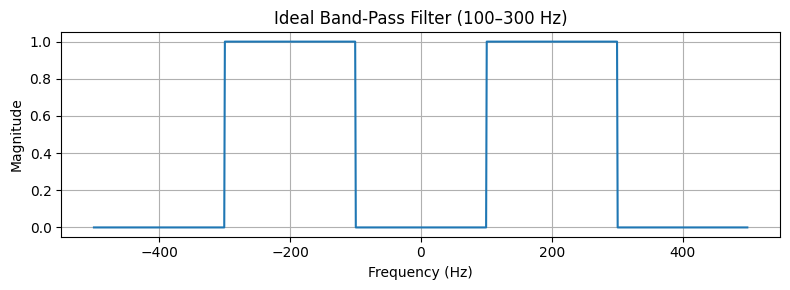

In [56]:
fs = 1000
N = 1024
f = np.fft.fftfreq(N, d=1/fs)

lpf = np.zeros(N)
lpf[np.abs(f) <= 300] = 1

hpf = np.zeros(N)
hpf[np.abs(f) >= 100] = 1

bpf = lpf * hpf

plt.figure(figsize=(8, 3))
plt.plot(np.fft.fftshift(f), np.fft.fftshift(bpf))
plt.title('Ideal Band-Pass Filter (100–300 Hz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()

## Q7.
- Design an ideal band-stop (notch) filter centered at 50 Hz with bandwidth 10 Hz.
- Use the complement of a narrow band-pass filter.
- Plot the impulse and frequency responses.

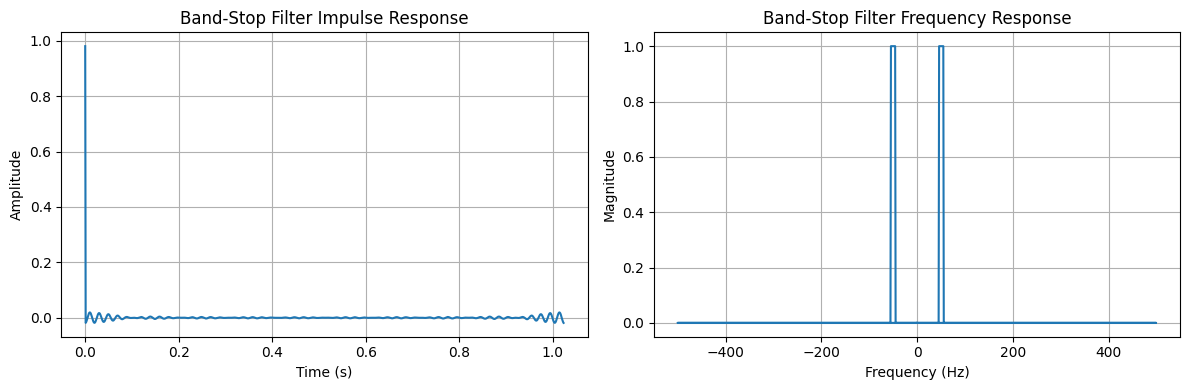

In [57]:
lpf = np.zeros(N)
lpf[np.abs(f) <= 55] = 1

hpf = np.zeros(N)
hpf[np.abs(f) >= 45] = 1

bpf = lpf * hpf

bsf = 1 - bpf

h_bsf = np.fft.ifft(bsf).real
t = np.arange(N) / fs

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(t, h_bsf)
ax[0].set_title('Band-Stop Filter Impulse Response')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Amplitude')
ax[0].grid()

ax[1].plot(f, bpf)
ax[1].set_title('Band-Stop Filter Frequency Response')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].grid()

plt.tight_layout()
plt.show()

# Part IV: Filter Length and Artifacts

## Q8.
- Analyze how the impulse response length N affects the filter’s sharpness and leakage:
    - Try N = 64, 256, 1024
    - Plot all 3 filters in frequency domain on same plot
    - Comment on trade-offs between time-localization and frequency sharpness.

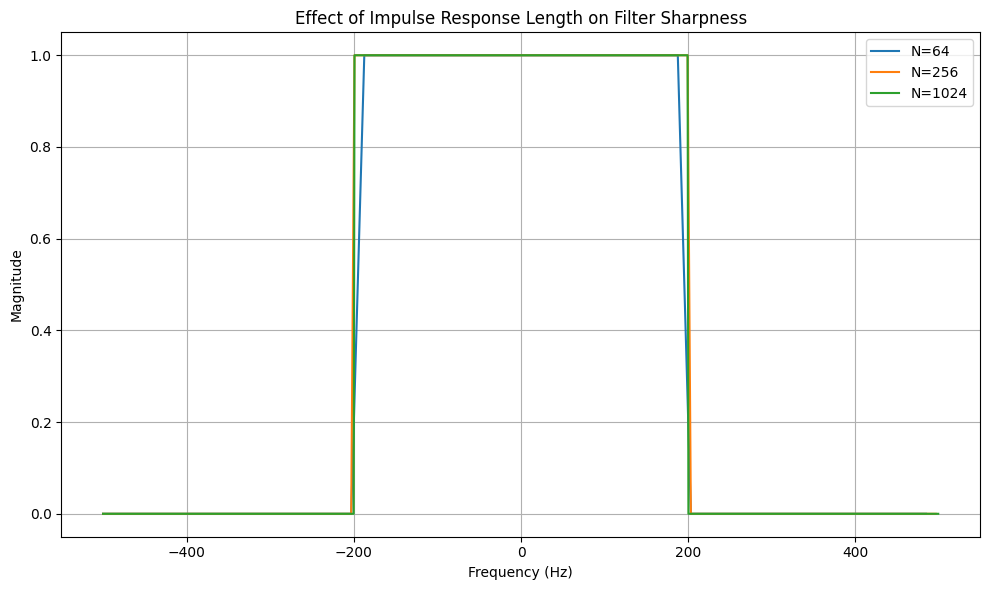

In [58]:
fs = 1000
fc = 200
Ns = [64, 256, 1024]

plt.figure(figsize=(10, 6))
for N in Ns:
    f = np.fft.fftfreq(N, 1/fs)

    H = np.zeros(N)
    H[np.abs(f) <= fc] = 1

    f_shifted = np.fft.fftshift(f)
    H_shifted = np.fft.fftshift(H)

    plt.plot(f_shifted, H_shifted, label=f'N={N}')

plt.title('Effect of Impulse Response Length on Filter Sharpness')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

- Small N → good time localization, poor frequency sharpness.
- Large N → sharp frequency cutoff, poor time localization.

## Q9.
- Compute and plot the phase response of any ideal filter you designed.
- Is it linear phase? Why or why not?

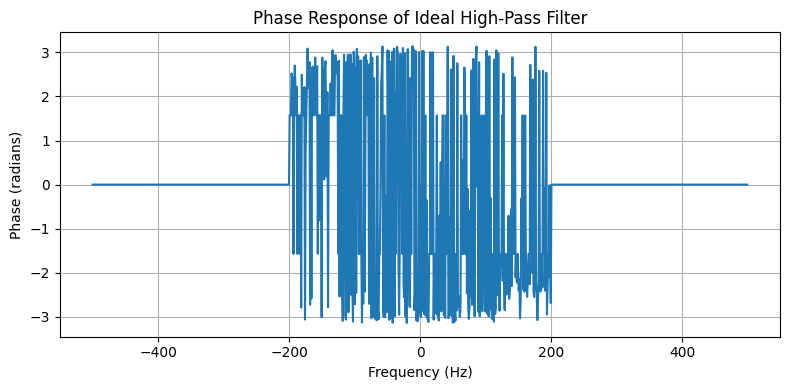

In [ ]:
H_response = np.fft.fft(h_hp)
phase = np.angle(H_response)

f = np.fft.fftfreq(len(h_hp), d=1/fs)
f_shifted = np.fft.fftshift(f)
phase_shifted = np.fft.fftshift(phase)

# Plot phase response
plt.figure(figsize=(8, 4))
plt.plot(f_shifted, phase_shifted)
plt.title('Phase Response of Ideal High-Pass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid(True)
plt.tight_layout()
plt.show()

No, it is not linear phase.

👉 Because the impulse response is not symmetric in time.

# ---------------------------------------------
# Topic 7: Wavelet Transform (DWT)
# ---------------------------------------------

# Part I: Wavelet vs Fourier

## Q1.
- Explain one key difference between the Short-Time Fourier Transform (STFT) and the Discrete Wavelet Transform (DWT).
- Use one sentence and focus on time-frequency resolution.

# Part II: DWT on a Simple Signal

## Q2.
- Generate a signal x[n] = sin(2π·5·n/fs) for n = 0 to 255 with fs = 100 Hz.
- Add a short transient (impulse) at n = 128:
    - x[128] += 5
- Plot the full signal.

## Q3.
- Use PyWavelets (`import pywt`) to compute a 3-level DWT using the 'db2' (Daubechies-2) wavelet.
- Extract:
    - Approximation coefficients at level 3
    - Detail coefficients at levels 1, 2, and 3
- Plot all four components in subplots.

## Q4.
- Reconstruct the original signal from the DWT coefficients using `pywt.waverec`.
- Plot the original and reconstructed signals.
- Comment on any loss or distortion.

# Part III: Time-Frequency Localization

## Q5.
- Compare the ability of DWT and STFT to localize:
    - Slow sinusoidal trend
    - Fast transient (impulse)
- Generate one test signal with both features and plot the DWT vs STFT outputs.
- Comment which method localizes what better.

# Part IV: Denoising Application

## Q6.
- Add white Gaussian noise to the original signal (mean=0, std=0.5).
- Perform DWT with 4 levels using ‘db4’ wavelet.
- Threshold the detail coefficients (set small values to 0).
- Reconstruct the denoised signal.
- Plot: Noisy signal, Denoised signal, Original clean signal.
- Comment on what was removed and what was preserved.

# Part V: DWT Compression

## Q7.
- Compute the percentage of DWT coefficients that are zero after thresholding.
- Comment how this relates to signal compression.